# EDA and ETL for scraped data from IPM and AskExtension data knowledge

In [1]:
import os
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

COLOR = 'white'
plt.rcParams['text.color'       ] = COLOR
plt.rcParams['text.color'       ] = COLOR
plt.rcParams['axes.labelcolor'  ] = COLOR
plt.rcParams['xtick.color'      ] = COLOR
plt.rcParams['ytick.color'      ] = COLOR

# IPM data - December 2021 Scrape

In [2]:
'''
['exoticPests.json',
 'fruitItems_new.json',
 'fruitVeggieEnvironItems_new.json',
 'ipmdata_new.json',
 'pestDiseaseItems_new.json',
 'plantFlowerItems.json',
 'turfPests.json',
 'veggieItems_new.json',
 'weedItems.json']
'''
_PATH = '../data/uc-ipm/updated-Dec2021/'
DATA_FILE_NAMES = sorted(os.listdir(_PATH))

## Pests - IPM data

In [6]:
FILE_NAME = 'ipmdata_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 214 non-null    object
 1   urlPestNote          214 non-null    object
 2   descriptionPestNote  214 non-null    object
 3   life_cycle           214 non-null    object
 4   damagePestNote       214 non-null    object
 5   managementPestNote   214 non-null    object
 6   imagePestNote        214 non-null    object
 7   tablePestNote        214 non-null    object
 8   urlQuickTip          214 non-null    object
 9   contentQuickTips     214 non-null    object
 10  imageQuickTips       214 non-null    object
 11  video                214 non-null    object
dtypes: object(12)
memory usage: 20.2+ KB


In [7]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:
tablePestNote        - 29%
urlQuickTip          - 25%
contentQuickTips     - 25%
imageQuickTips       - 24%
video                - 13%


In [8]:
df.sample(5)

,name,urlPestNote,descriptionPestNote,life_cycle,damagePestNote,managementPestNote,imagePestNote,tablePestNote,urlQuickTip,contentQuickTips,imageQuickTips,video
159,Codling Moth,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7412.html...,"Codling moth, Cydia (Laspeyresia) pomonella, i...",Codling moth overwinters as full-grown larvae ...,"On apples and pears, larvae penetrate into the...","Codling moth can be very difficult to manage, ...","[{'caption': 'Figure 1. Adult codling moth.', ...",[],http://ipm.ucanr.edu/QT/codlingmothcard.html?s...,"Codling moth, the infamous “worm” in the apple...",[{'link': 'http://ipm.ucanr.edu/PMG/C/I-LP-CPO...,[]
121,Silverfish and Firebrats,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7475.html...,If items on your bookshelf have chewed-on page...,"The common silverfish, Lepisma saccharina, is ...",Firebrats and silverfish have very weak mandib...,"Since firebrats and silverfish are nocturnal, ...",[{'caption': 'Figure 1. Adult firebrat (left) ...,[],,,[],[]
52,Plantains,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7478.html...,Broadleaf and buckhorn plantain (Plantago majo...,Broadleaf plantain commonly occurs in moist ar...,This weed may form dense populations of indivi...,Remove any new plantain seedlings and more mat...,"[{'caption': 'Broadleaf plantain, Plantago maj...","[<table class=""indextable"" style=""width: 60%"">...",,,[],[]
152,Eucalyptus Redgum Lerp Psyllid,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7460.html...,The redgum lerp psyllid (Glycaspis brimblecomb...,,Psyllid nymphs and adults feed by sucking plan...,The species of eucalyptus primarily determines...,[{'caption': 'Adult and eggs of eucalyptus red...,"[<table cellspacing=""0"" cellpadding=""2"" border...",,,[],[]
123,Red Imported Fire Ant,http://ipm.ucanr.edu/PMG/PESTNOTES/pn7487.html...,The red imported fire ant (Solenopsis invicta)...,Red imported fire ant workers are variable in ...,The red imported fire ant's sting is a serious...,"Because fire ants can sting en masse, most peo...",[{'caption': 'Red imported fire ant queen surr...,"[<table class=""indextable"" id=""TABLE1"">\n<capt...",,,[],[]


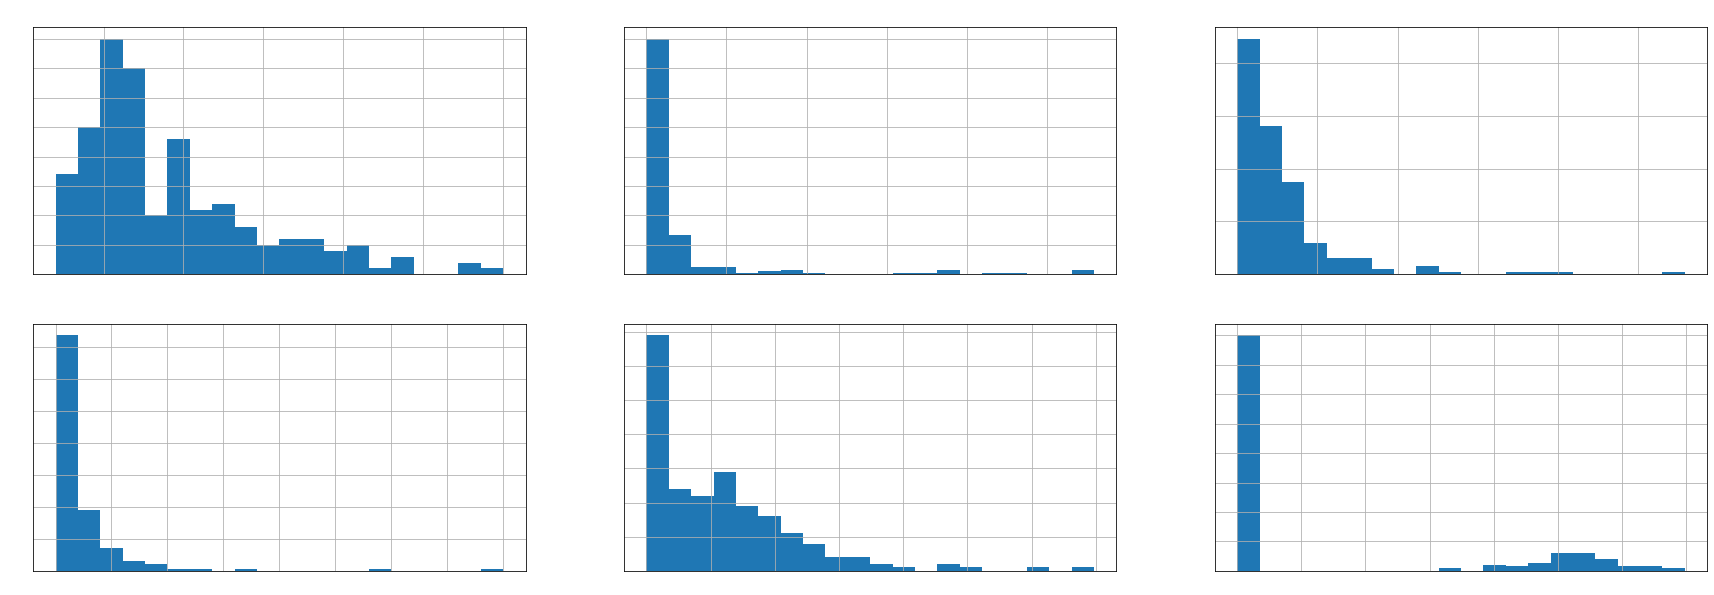

In [9]:
text_columns = ['name', 'descriptionPestNote', 'life_cycle', 'damagePestNote', 'managementPestNote', 'contentQuickTips']
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### IPM Data - `ipmdata_new.json`

| column              | type                                  |
|---------------------|---------------------------------------|
| name                | string                                |
| urlPestNote         | string                                |
| descriptionPestNote | string                                |
| life_cycle          | string                                |
| damagePestNote      | string                                |
| managementPestNote  | string                                |
| imagePestNote       | [{link: " ", src: " ", caption: " "}] |
| tablePestNote       | [" ", " "]                            |
| urlQuickTip         | string                                |
| contentQuickTips    | string                                |
| imageQuickTips      | [{link: " ", src: " ", caption: " "}] |
| video               | [{videoLink: " ", videoTitle: " "}]   |

Example of the single JSON data entry:
```json
{
    "name": "Thrips",
    "urlPestNote": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7429.html?src=exchbt",
    "descriptionPestNote": "Thrips, order Thysanoptera, are tiny, slender insects with fringed wings....",
    "life_cycle": "Most adult thrips are elongate, slender, minute (less than 1/20 inch long), and h...",
    "damagePestNote": "Thrips feeding on plants can damage fruit, leaves, and shoots and very notice...",
    "managementPestNote": "Thrips are difficult to control. If management is necessary, use an integ...",
    "imagePestNote": [
        {
            "caption": "Stippling as result of greenhouse thrips feeding.",
            "link": "http://ipm.ucanr.edu/PMG/H/I-TS-HHAE-CD.013.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/H/I-TS-HHAE-CD.013h.jpg?src=exchbt"
        },
        {
            "caption": "Black feces and white feeding scars from thrips.",
            "link": "http://ipm.ucanr.edu/PMG/F/I-TS-FOCC-CD.008.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/F/I-TS-FOCC-CD.008h.jpg?src=exchbt"
        },
        ...
    ],
    "tablePestNote": [...],
    "urlQuickTip": "http://ipm.ucanr.edu/QT/thripscard.html?src=exchbt",
    "contentQuickTips": "When thrips feed, they distort or scar leaves, flowers, or fruit. Healthy w...",
    "imageQuickTips": [
        {
            "link": "http://ipm.ucanr.edu/PMG/F/I-TS-FOCC-AD.010.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/F/I-TS-FOCC-AD.010h.jpg?src=exchbt",
            "caption": "Adult western flower thrips."
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/H/I-TS-HHAE-CO.004.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/H/I-TS-HHAE-CO.004h.jpg?src=exchbt",
            "caption": "Greenhouse thrips adults (black) and nymphs (yellow)."
        },
        ...
    ],
    "video": [
      {
        "videoLink": "https://www.youtube.com/watch?v=oXkp90opkjU?src=exchbt",
        "videoTitle": "Monitoring for Thrips in Avocado Orchards"
      },
      {
        "videoLink": "https://youtu.be/l2GnmTjQLp0?src=exchbt",
        "videoTitle": "UC Ag Experts Talk: Citrus Thrips"
      },
      ...
    ]
}
```
### Metadata on data source

Data about the pests. `descriptionPestNote` can be used to describe the pest. `damagePestNote` can be used to match damage description. Target can extracted from main fields as well as image and video captions. Following slots can be used for filter - `plant_name`, `problem`, `problem_description`, `target`. 
Notes:
* `descriptionPestNote`, `life_cycle`, `managementPestNote`, `contentQuickTips` - main fields.
* `imagePestNote/caption`, `imageQuickTips/caption`, `video/title` - additional fields.


## Pests - causing diseases

In [10]:
FILE_NAME = 'pestDiseaseItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            519 non-null    object
 1   url             519 non-null    object
 2   description     519 non-null    object
 3   identification  519 non-null    object
 4   life_cycle      519 non-null    object
 5   damage          519 non-null    object
 6   solutions       519 non-null    object
 7   images          519 non-null    object
dtypes: object(8)
memory usage: 32.6+ KB


In [11]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:
identification       - 30%
life_cycle           - 35%
damage               - 30%


In [12]:
df.sample(5)

,name,url,description,identification,life_cycle,damage,solutions,images
278,Kuwana oak scale,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/INVERT/...,This sucking insect (Kuwaniidae) feeds on the ...,,,,,[{'link': 'http://ipm.ucanr.edu/PMG/K/I-HO-KQU...
410,Downy mildew,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/DISEASE/...,,Downy mildew causes yellowish and oily or angu...,Grape downy mildew occurs mainly in regions wh...,,The best way to control downy mildew is by pre...,[{'link': 'http://ipm.ucanr.edu/PMG/P/D-GR-PVI...
209,Citricola scale,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/INVERT/...,This phloem-sucking soft scale (Coccidae) is a...,,,,,[{'link': 'http://ipm.ucanr.edu/PMG/C/I-HO-CPS...
241,"Longhorned beetles, or roundheaded wood borers",http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/INVERT/...,Most any woody species can become infested by ...,Oval-shaped or round emergence holes in bark a...,"Females lay eggs in bark crevices, and the eme...",Native species of roundheaded borers attack mo...,Prevention is the primary method of preventing...,[{'link': 'http://ipm.ucanr.edu/PMG/P/I-CO-PSE...
60,White mold,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/DISEASES...,White mold is a distinctive disease that most ...,,"The white mold fungus, Sclerotinia spp., survi...",,White mold is favored by a wet soil surface. U...,[{'link': 'http://ipm.ucanr.edu/PMG/S/D-CC-SMI...


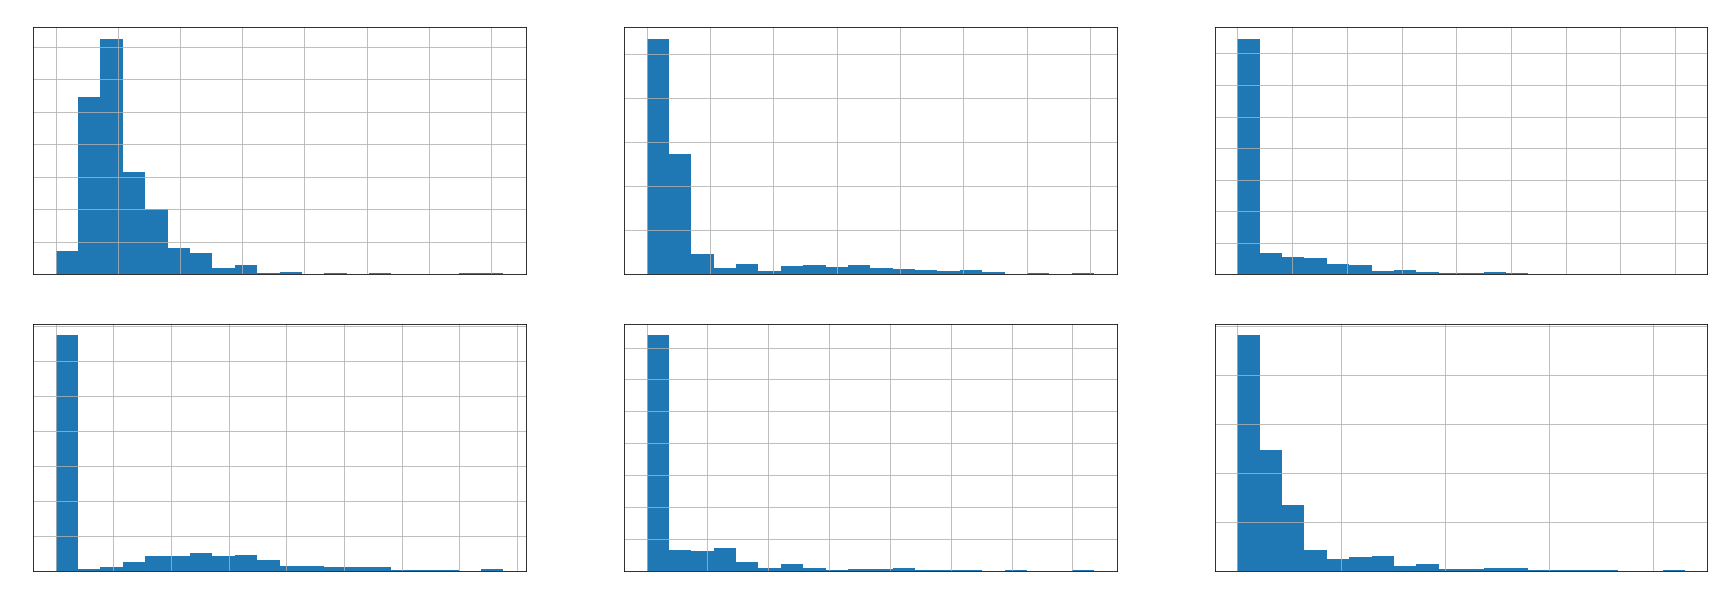

In [13]:
text_columns = ['name', 'description', 'identification', 'life_cycle', 'damage', 'solutions']
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Pest Diseases - `pestDiseasesItems_new.json`

| column         | type                                  |
|----------------|---------------------------------------|
| name           | string                                |
| url            | string                                |
| description    | string                                |
| identification | string                                |
| life_cycle     | string                                |
| damage         | string                                |
| solutions      | string                                |
| images         | [{link: " ", src: " ", caption: " "}] |


Example of the single JSON data entry:

```json
{
    "name": "Stink bugs",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/stinkbug.html?src=exchbt",
    "description": "These sucking insects (family Pentatomidae) are shield shaped. Their common ...",
    "identification": "Adult stink bugs are distinguished from other insects by the large ...",
    "life_cycle": "Stink bugs develop through three life stages: egg, nymph, and adult. ...",
    "damage": "Adults suck and feed on plants with their strawlike mouthparts. Stink bugs ...",
    "solutions": "Handpick the bugs and their eggs from small plants. Eliminate groundcovers...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-AD.015.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-AD.015a.jpg?src=exchbt",
            "caption": "Adults of southern green stink bug (left), redshouldered stink bug, (upper right) and consperse stink bug."
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-EG.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-EG.001b.jpg?src=exchbt",
            "caption": "First instars of consperse stink bug and their empty egg cases."
        },
        ...
    ]
},
```

### Metadata on data source

Information on pests.

## Pests - turf (grass)

In [14]:
FILE_NAME = 'turfPests.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    39 non-null     object
 1   url     39 non-null     object
 2   text    39 non-null     object
 3   images  39 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


In [15]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [16]:
df.sample(5)

,name,url,text,images
20,Dog injury,http://ipm.ucanr.edu/TOOLS/TURF/PESTS/abiodog....,Symptoms\nCircular spots of dead turf surround...,[{'link': 'http://ipm.ucanr.edu/PMG/C/V-MA-CFA...
37,Racoons and skunks,http://ipm.ucanr.edu/TOOLS/TURF/PESTS/vertrac....,Damage\nRaccoons and skunks dig up turf as the...,[{'link': 'http://ipm.ucanr.edu/PMG/U/V-MA-UNK...
33,Black turfgrass ataenius,http://ipm.ucanr.edu/TOOLS/TURF/PESTS/inbta.ht...,"Identification Adult beetles are shiny, jet bl...",[{'link': 'http://ipm.ucanr.edu/PMG/A/I-CO-ASP...
22,Fertilizer Burn,http://ipm.ucanr.edu/TOOLS/TURF/PESTS/abiofert...,"Symptoms\nStripes of green, white, or brown tu...",[{'link': 'http://ipm.ucanr.edu/PMG/C/A-TG-CUL...
17,Item damage,http://ipm.ucanr.edu/TOOLS/TURF/PESTS/abioitem...,Symptoms\nItems left on the lawn may eventuall...,[{'link': 'http://ipm.ucanr.edu/PMG/C/A-TG-CUL...


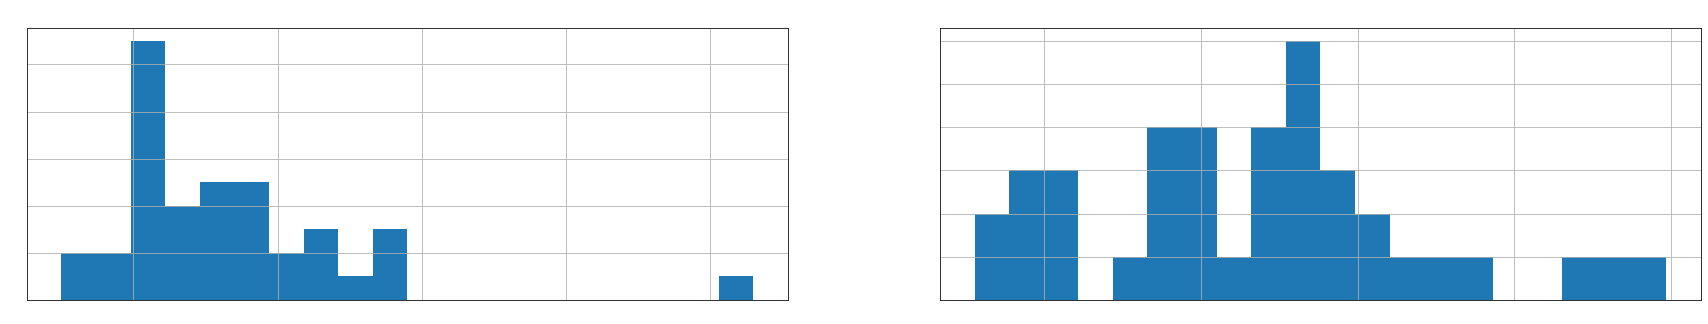

In [17]:
text_columns = ['name', 'text']
fig, axes = plt.subplots(1, 2, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Turf Pests - `turfPests.json`

| column | type                                  |
|--------|---------------------------------------|
| name   | string                                |
| url    | string                                |
| text   | string                                |
| images | [{link: " ", src: " ", caption: " "}] |

Example of the single JSON data entry:

```json
{
    "name": "Fiery skipper",
    "url": "http://ipm.ucanr.edu/TOOLS/TURF/PESTS/inskipper.html?src=exchbt",
    "text": "Identification Fiery skipper adults resemble butterflies and are 1 inch...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-AD.003.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/infieryad.jpg?src=exchbt",
            "caption": "Fiery skipper adult"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-LV.009.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/inskiplv.jpg?src=exchbt",
            "caption": "Skipper larva with dark head and thoracic shield"
        },
        ...
    ]
},
```
### Metadata on data source

Inoformation on turf pests (grass).

## Pests - exotic types

In [18]:
FILE_NAME = 'exoticPests.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            31 non-null     object
 1   url             31 non-null     object
 2   description     31 non-null     object
 3   damage          31 non-null     object
 4   identification  31 non-null     object
 5   life_cycle      31 non-null     object
 6   monitoring      31 non-null     object
 7   management      31 non-null     object
 8   related_links   31 non-null     object
 9   images          29 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [19]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:
description          - 10%
damage               - 3%
identification       - 3%
life_cycle           - 3%
monitoring           - 3%
management           - 3%
images               - 10%


In [20]:
df.sample(5)

,name,url,description,damage,identification,life_cycle,monitoring,management,related_links,images
24,Invasive Aquatic Plants,https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,[{'text': 'Web site: UC Weed Research and Info...,[]
14,Walnut Twig Beetle,https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,[{'text': 'UC IPM releases national trapping g...,[]
5,Granulate Ambrosia Beetle,https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,[{'text': 'Urban & Community: Granulate Ambros...,[]
10,South American Tomato Leafminer (Tuta absoluta),https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,"[{'text': 'South American Tomato Leafminer, Tu...",[]
12,Spotted Lanternfly,https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,,,,,,,[{'text': 'Website: Spotted Lanternfly UCCE So...,[]


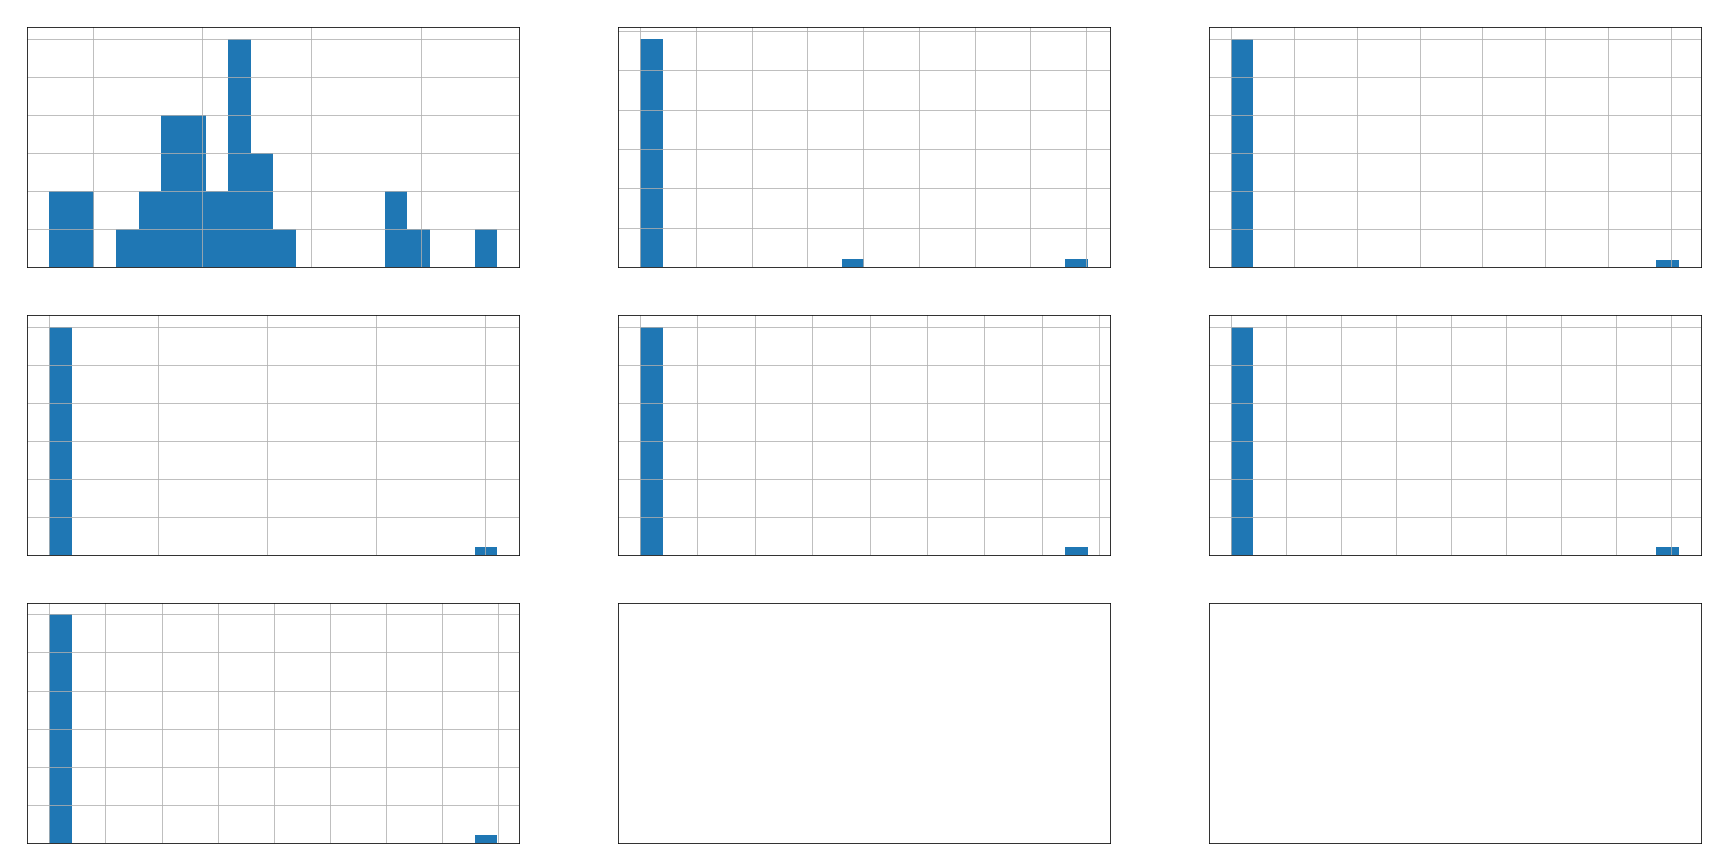

In [21]:
text_columns = ['name', 'description', 'damage', 'identification', 'life_cycle', 'monitoring', 'management']
fig, axes = plt.subplots(3, 3, figsize = (30, 15))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Exotic pests - `exoticPests.json`

| column         | type                     |
|----------------|--------------------------|
| name           | string                   |
| url            | string                   |
| description    | string                   |
| damage         | string                   |
| identification | string                   |
| life_cycle     | string                   |
| monitoring     | string                   |
| management     | string                   |
| related_links  | [{text: " ", link: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "European Grapevine Moth",
    "url": "https://www2.ipm.ucanr.edu/Invasive-and-Exotic-Pests/European-grapevine-moth/?src=exchbt",
    "description": "Lobesia botrana, the European grapevine moth, was first reported in the United ...",
    "damage": "In May and June, first-generation larvae web and feed on the flower clusters. Secon...",
    "identification": "The adult moth is approximately 0.24 to 0.3 inch (6-8 mm) long, with a wing...",
    "life_cycle": "European grapevine moth has two generations in its life cycle in northern Europ...",
    "monitoring": "Sex pheromone attracts males and is used to monitor male flights. Before bud br...",
    "management": "In countries where L. botrana is established, control measures are targeted at ...",
    "related_links": [
        {
        "text": "Grape pest management guidelines",
        "link": "http://ipm.ucanr.edu/PMG/selectnewpest.grapes.html?src=exchbt"
        },
        {
        "text": "Video presentation",
        "link": "http://stream.ucanr.org/ipm_ag_urban/evgm2011/?src=exchbt"
        }
    ],
    "images": [
        {
        "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-AD.002.html?src=exchbt",
        "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-AD.002h.jpg?src=exchbt",
        "caption": "Adult female European grapevine moth."
        },
        {
        "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-CD.004.html?src=exchbt",
        "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-CD.004h.jpg?src=exchbt",
        "caption": "Grape bunches with webbing, frass, and fungal infections."
        },
        ...
    ]
}
```

### Metadata on data source

Information on exotic pests.

Notes:
* `description`, `damage`, `identification`, `life_cycle`, `monitoring`, `management` - main fields.
* `related_links/text`, `images/caption` - additional fields.
    
Out of 15-20 source, only 2 have description field filled.

## Environmental damages - fruits and veggies

In [22]:
FILE_NAME = 'fruitVeggieEnvironItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  223 non-null    object
 1   url                   223 non-null    object
 2   description           223 non-null    object
 3   identification        223 non-null    object
 4   damage                223 non-null    object
 5   disorder_development  223 non-null    object
 6   solutions             223 non-null    object
 7   images                223 non-null    object
dtypes: object(8)
memory usage: 14.1+ KB


In [23]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:
identification       - 13%
damage               - 6%
disorder_development - 2%


In [24]:
df.sample(5)

,name,url,description,identification,damage,disorder_development,solutions,images
181,Soil preparation,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/ENVIRON/...,The preparation of your soil is just as import...,,,,,[]
139,Recognizing hazardous trees,http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/hazard...,,Warning signs that trees may be hazardous incl...,,,Some tree hazards can be avoided by preventing...,[{'link': 'http://ipm.ucanr.edu/PMG/U/D-WO-UNK...
167,Small or weak asparagus spears,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/ENVIRON/...,"Spears are thin and weak, or spears do not com...",,,,Plants can be weakened by several factors incl...,[{'link': 'http://ipm.ucanr.edu/PMG/V/S-VC-VEG...
64,Watering grapes,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/...,Irrigation is essential for good vine growth a...,,,,,[]
161,Sunburn on corn,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/ENVIRON/...,"Sunburned plants have yellowed, scalded, or bl...",,,,Sunburn is usually associated with hot weather...,[{'link': 'http://ipm.ucanr.edu/PMG/W/A-CN-WEA...


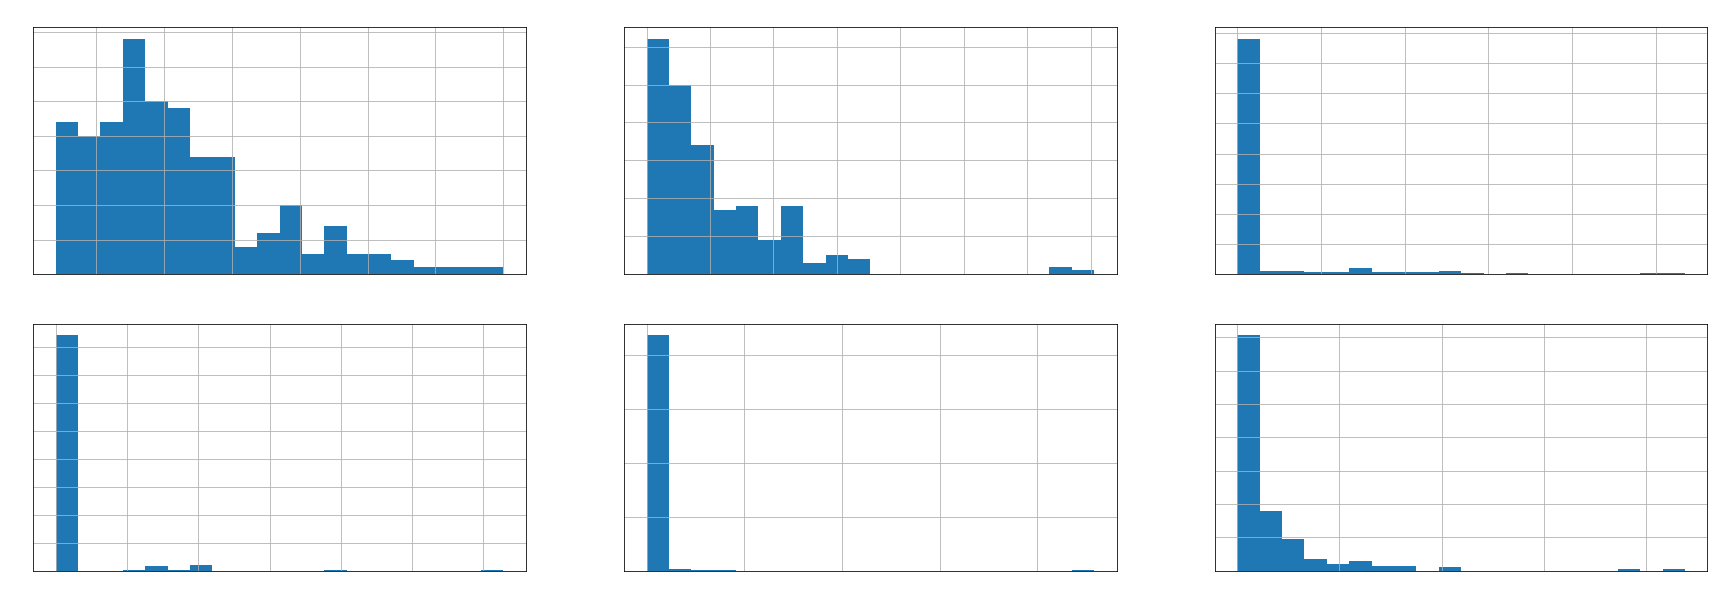

In [25]:
text_columns = ['name', 'description', 'identification', 'damage', 'disorder_development', 'solutions']
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(text_columns):
    r = i//3
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Environment Fruit and Veggie - `fruitVeggieEnvironItems_new.json`

| column               | type                                  |
|----------------------|---------------------------------------|
| name                 | string                                |
| url                  | string                                |
| description          | string                                |
| identification       | string                                |
| damage               | string                                |
| disorder_development | string                                |
| solutions            | string                                |
| images               | [{link: " ", src: " ", caption: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Wind",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/wind.html?src=exchbt",
    "description": "Wind can damage bark, flowers, foliage, fruit, and limbs of most any...",
    "identification": "Plants growing at windy sites often have smaller-than-normal leaves...",
    "damage": "Wind-damaged leaves become necrotic along the margins and tips and drop prema...",
    "disorder_development": "Wind commonly causes water deficit. If soil moisture is low, or w...",
    "solutions": "Provide plants with proper cultural care, especially appropriate irrigation...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FS.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FS.002a.jpg?src=exchbt",
            "caption": "Wind-sculptured cypress"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FO.041.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FO.041a.jpg?src=exchbt",
            "caption": "Necrotic, wind-tattered leaves"
        },
        ...
    ]
}
```

### Metadata on data source

Environment caused problems on veggies and fruites. `problem_description` can be used to find matches.

Notes:
* `name`, `description`, `identification`, `damage`, `disorder_development`, `solutions` - main fields
* `images/caption` - additional fields

## Environmental damages - weeds

In [26]:
FILE_NAME = 'weedItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         174 non-null    object
 1   url          174 non-null    object
 2   description  174 non-null    object
 3   images       174 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


In [27]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [28]:
df.sample(5)

,name,url,description,images
125,Wild garlic,http://ipm.ucanr.edu/PMG/WEEDS/wild_garlic.htm...,Wild garlic is a perennial plant that primaril...,[{'link': 'http://ipm.ucanr.edu/PMG/A/W-LI-AVI...
43,Creeping spurge,http://ipm.ucanr.edu/PMG/WEEDS/creeping_spurge...,Creeping spurge is a summer annual broadleaf p...,[{'link': 'http://ipm.ucanr.edu/PMG/C/W-EU-CSE...
118,Healall,http://ipm.ucanr.edu/PMG/WEEDS/healall.html?sr...,Healall is a perennial broadleaf weed found in...,[{'link': 'http://ipm.ucanr.edu/PMG/P/W-LB-PVU...
27,Indian tobacco,http://ipm.ucanr.edu/PMG/WEEDS/indian_tobacco....,"Indian tobacco, a California native, is a summ...",[{'link': 'http://ipm.ucanr.edu/PMG/N/W-SO-NQU...
71,Redroot pigweed,http://ipm.ucanr.edu/PMG/WEEDS/redroot_pigweed...,"Redroot pigweed, a summer annual broadleaf pla...",[{'link': 'http://ipm.ucanr.edu/PMG/A/W-AM-ARE...


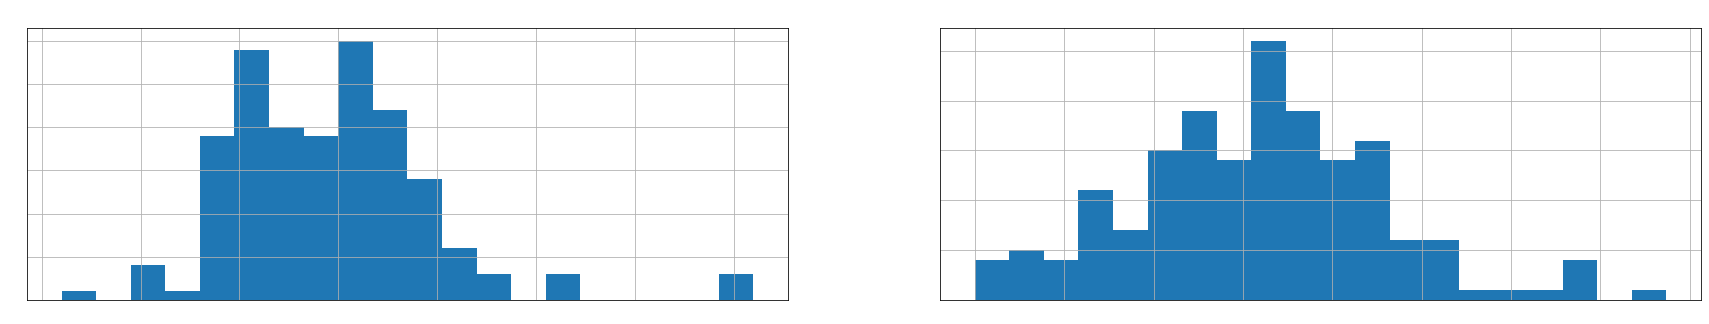

In [29]:
text_columns = ['name', 'description']
fig, axes = plt.subplots(1, 2, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%2
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Weed - `weedItems.json`

| column      | type                        |
|-------------|-----------------------------|
| name        | string                      |
| url         | string                      |
| description | string                      |
| images      | [{link: " ", caption: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Gregg arrowhead",
    "url": "http://ipm.ucanr.edu/PMG/WEEDS/gregg_arrowhead.html?src=exchbt",
    "description": "Gregg arrowhead is a native aquatic perennial that occurs in the...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SMON-MP.003.html?src=exchbt",
            "caption": "top picture"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SLON-SG.001.html?src=exchbt",
            "caption": "bottom left picture"
        },
        ...
    ]
}
```

### Metadata on data source

Description of the weed (problematic). Weed is any plant growing in cultivated ground to the injury of the crop or desired vegetation.

## Information - fruits

In [30]:
FILE_NAME = 'fruitItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 15 non-null     object
 1   url                  15 non-null     object
 2   cultural_tips        14 non-null     object
 3   pests_and_disorders  15 non-null     object
dtypes: object(4)
memory usage: 608.0+ bytes


In [31]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [32]:
df.sample(5)

,name,url,cultural_tips,pests_and_disorders
11,Avocados,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/avocados...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Amorbia', 'link': 'http://ipm.uc..."
6,Blackberries and Raspberries,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/blackber...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Spotted wing drosophila', 'link'..."
1,Citrus,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/citrus.h...,[{'tip': 'Citrus Varieties for the Home Garden...,"[{'problem': 'Asian Citrus Psyllid', 'link': '..."
9,Grapes,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/grapes.h...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
8,Plums and Prunes,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/plumspru...,"[{'tip': 'Fertilizing', 'link': 'http://ipm.uc...","[{'problem': 'Aphids', 'link': 'http://ipm.uca..."


### Fruits - `fruitItems_new.json`

| column              | type                      |
|---------------------|---------------------------|
| name                | string                    |
| url                 | string                    |
| cultural_tips       | [{tip: "", link: ""}]     |
| pests_and_disorders | [{problem: "", link: ""}] |

Example of the single JSON data entry:
```json
{
    "name": "Figs",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/figs.html?src=exchbt",
    "cultural_tips": [
        {
            "tip": "Fertilizing",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/fgfertilizing.html?src=exchbt"
        },
        {
            "tip": "First-year pruning",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondfirst.html?src=exchbt"
        },
        ...
    ],
    "pests_and_disorders": [
        {
            "problem": "Ants",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7411.html?src=exchbt"
        },
        {
            "problem": "Carpenterworm",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn74105.html?src=exchbt"
        },
        ...
    ]
}
```
### Metadata on data source

Information on fruits. Name with cultural tips and problems can be used to search for the queries. Following slots can be used - `plant_name`, `problem`.

Notes:
* Concatenate `name` and `cultural_tips/tip` - additional field.
* Concatenate `name` and `pests_and_disorders` - additional field.

## Information - veggies

In [33]:
FILE_NAME = 'veggieItems_new.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 31 non-null     object
 1   url                  31 non-null     object
 2   description          31 non-null     object
 3   tips                 31 non-null     object
 4   images               31 non-null     object
 5   pests_and_disorders  31 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB


In [34]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [35]:
df.sample(5)

,name,url,description,tips,images,pests_and_disorders
5,Broccoli,http://ipm.ucanr.edu/home-and-landscape/brocco...,"Broccoli, like other crops in the mustard fami...",Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Beet armyworm', 'link': 'http://..."
14,Turnip,http://ipm.ucanr.edu/home-and-landscape/turnip...,Turnips are a root vegetable in the same famil...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Beet armyworm', 'link': 'http://..."
16,Radish,http://ipm.ucanr.edu/home-and-landscape/radish...,"Radishes are grown for their crisp, spicy root...",Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Bagrada bug', 'link': 'http://ip..."
10,Beans,http://ipm.ucanr.edu/home-and-landscape/beans/...,"Beans are annual, warm-season legumes that are...",Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/M-AG-SCE...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca..."
9,Cabbage,http://ipm.ucanr.edu/home-and-landscape/cabbag...,Cabbage grows well in California from late fal...,Cultural practices such as proper site selecti...,[{'link': 'http://ipm.ucanr.edu/PMG/S/S-CC-SCE...,"[{'problem': 'Beet armyworm', 'link': 'http://..."


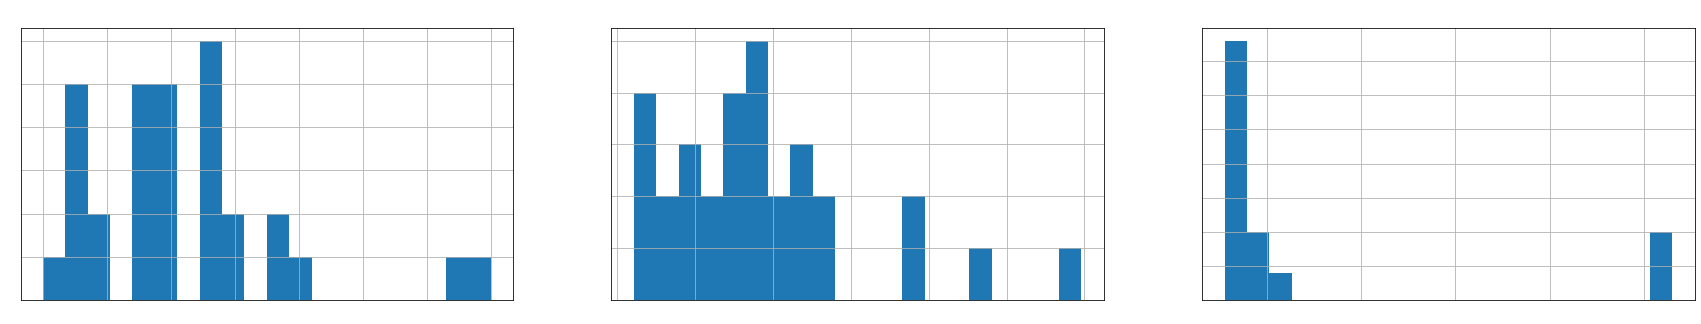

In [36]:
text_columns = ['name', 'description', 'tips']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Veggie - `veggieItems_new.json`

| column              | type                                  |
|---------------------|---------------------------------------|
| name                | string                                |
| url                 | string                                |
| description         | string                                |
| tips                | string                                |
| images              | [{link: " ", src: " ", caption: " "}] |
| pests_and_disorders | [{problem: "", link: ""}]             |

Example of the single JSON data entry:
```json
{
    "name": "Carrot ",
    "url": "http://ipm.ucanr.edu/home-and-landscape/carrot/index.html?src=exchbt",
    "description": "Carrots can be grown nearly year-round throughout California. A number of vari...",
    "tips": "Cultural practices such as proper site selection, soil preparation, planting, and wat...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/P/D-CA-PVIO-RO.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/P/D-CA-PVIO-RO.002.jpg?src=exchbt",
            "caption": "Cavity spot-induced, irregularly shaped lesions across mature carrot tap roots."
        },
        ...
    ],
    "pests_and_disorders": [
        {
            "problem": "Aphids",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7404.html?src=exchbt"
        },
        {
            "problem": "Carrot rust fly",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/carrotrustfly.html?src=exchbt"
        },
        ...
    ]
}
```

### Metadata on data source

Information on vegetables. `plant_name`, and `problem` can be used to search this data source.

Notes:
* `name`, `description`, `tips` - main fields.
* `images/caption` additional field.
* concatenate `name` + `pests_and_disorders` -  additional field.


## Information - flowers

In [37]:
FILE_NAME = 'plantFlowerItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 186 non-null    object
 1   url                  186 non-null    object
 2   identification       186 non-null    object
 3   optimum_conditions   186 non-null    object
 4   pests_and_disorders  186 non-null    object
 5   images               186 non-null    object
dtypes: object(6)
memory usage: 8.8+ KB


In [38]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [39]:
df.sample(5)

,name,url,identification,optimum_conditions,pests_and_disorders,images
125,"Cistus, rock rose",http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/cistus....,Rockrose is a fast-growing evergreen shrub. Le...,Rockrose is often planted in fire-hazard areas...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca...",[]
43,"Rhus, Lemonade berry, Sugarbush, Sumac, Wax tree",http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/rhus.ht...,Rhus,Many species of Rhus are grown as background p...,"[{'problem': 'Aphids', 'link': 'http://ipm.uca...",[{'link': 'http://ipm.ucanr.edu/PMG/A/S-WO-ANA...
58,"Sycamore, London plane tree",http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/sycamor...,Plant identification Sycamore is a fast-growin...,Trees are adapted to a wide range of climate z...,"[{'problem': 'American plum borer', 'link': 'h...",[{'link': 'http://ipm.ucanr.edu/PMG/V/S-WO-VEG...
103,Flannel bush,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/flannel...,Flannel bush is a fast-growing evergreen shrub...,Flannel bush grows best if planted along hills...,"[{'problem': 'Armored scales', 'link': 'http:/...",[]
35,"Chinese tallow tree, Japanese tallow tree",http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/tallowt...,Chinese tallow is a deciduous tree that can gr...,Chinese tallow tree can grow in most landscape...,"[{'problem': 'Armillaria root rot', 'link': 'h...",[{'link': 'http://ipm.ucanr.edu/PMG/E/S-WO-EUP...


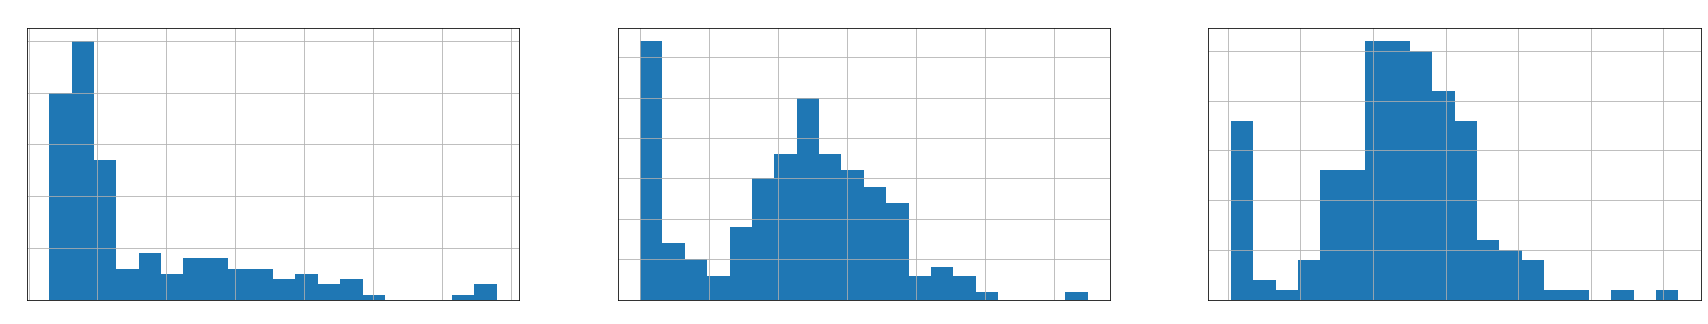

In [40]:
text_columns = ['name', 'identification', 'optimum_conditions']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    c = i%3
    df[col].apply(len).hist(figure = fig, bins = 20, ax = axes[c])
    axes[c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### Flowers - `plantFlowerItems.json`

| column              | type                        |
|---------------------|-----------------------------|
| name                | string                      |
| url                 | string                      |
| identification      | string                      |
| optimum_conditions  | string                      |
| pests_and_disorders | [{problem: " ", link: " "}] |

Example of the single JSON data entry:
```json
{
    "name": "Abelia",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/abelia.html?src=exchbt",
    "identification": "Abelias are evergreen or semievergreen deciduous shrubs. Leaves are ...",
    "optimum_conditions": "Abelias can be planted as borders or barriers. Varieties that ...",
    "pests_and_disorders": [
        {
            "problem": "Root knot nematodes",
            "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7489.html?src=exchbt"
        },
        {
            "problem": "Mineral deficiencies",
            "link": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/mineraldef.html?src=exchbt"
        },
        ...
    ],
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FL.017.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FL.017a.jpg?src=exchbt",
            "caption": "Abelia flowers"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FO.011.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FO.011a.jpg?src=exchbt",
            "caption": "LEaves of Abelia"
        }
    ]
}
```
### Metadata on data source

Description of the flowers.

* `name` and `pest_and_disorders` - main fields
* `images/caption` - additional fields


## Final transformations


There is going to be single merged index consisting of the following:

### `Problems` index: 
```json
[
    {
        "source": "PestsIPM",
        "name": "Thrips",
        "urlPestNote": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7429.html?src=exchbt",                                 # url
        "descriptionPestNote": "Thrips, order Thysanoptera, are tiny, slender insects with fringed wings...",       # description
        "life_cycle": "Most adult thrips are elongate, slender, minute (less than 1/20 inch long), and h...",       # development
        "damagePestNote": "Thrips feeding on plants can damage fruit, leaves, and shoots and very notice...",       # damage
        "managementPestNote": "Thrips are difficult to control. If management is necessary, use an integ...",       # management
        "imagePestNote": [                                                                                          # links (type - images)
            {
                "caption": "Stippling as result of greenhouse thrips feeding.",
                "link": "http://ipm.ucanr.edu/PMG/H/I-TS-HHAE-CD.013.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/H/I-TS-HHAE-CD.013h.jpg?src=exchbt"
            },
            {
                "caption": "Black feces and white feeding scars from thrips.",
                "link": "http://ipm.ucanr.edu/PMG/F/I-TS-FOCC-CD.008.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/F/I-TS-FOCC-CD.008h.jpg?src=exchbt"
            },
            ...
        ],
        "tablePestNote": [...],                                                                                     # omit
        "urlQuickTip": "http://ipm.ucanr.edu/QT/thripscard.html?src=exchbt",                                        # fill main URL if absent
        "contentQuickTips": "When thrips feed, they distort or scar leaves, flowers, or fruit. Healthy w...",       # fill description, damage, management if absent
        "imageQuickTips": [                                                                                         # merge with links (link type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/F/I-TS-FOCC-AD.010.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/F/I-TS-FOCC-AD.010h.jpg?src=exchbt",
                "caption": "Adult western flower thrips."
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/H/I-TS-HHAE-CO.004.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/H/I-TS-HHAE-CO.004h.jpg?src=exchbt",
                "caption": "Greenhouse thrips adults (black) and nymphs (yellow)."
            },
            ...
        ],
        "video": [                                                                                                  # merge with images (link type - video)
            {
                "videoLink": "https://www.youtube.com/watch?v=oXkp90opkjU?src=exchbt",
                "videoTitle": "Monitoring for Thrips in Avocado Orchards"
            },
            {
                "videoLink": "https://youtu.be/l2GnmTjQLp0?src=exchbt",
                "videoTitle": "UC Ag Experts Talk: Citrus Thrips"
            },
            ...
        ]
    },
    {
        "source": "PestsDiseases",
        "name": "Stink bugs",
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/stinkbug.html?src=exchbt",                              # url
        "description": "These sucking insects (family Pentatomidae) are shield shaped. The...",                     # description
        "identification": "Adult stink bugs are distinguished from other insects by the la...",                     # identification
        "life_cycle": "Stink bugs develop through three life stages: egg, nymph, and adult...",                     # development
        "damage": "Adults suck and feed on plants with their strawlike mouthparts. Stink b...",                     # damage
        "solutions": "Handpick the bugs and their eggs from small plants. Eliminate ground...",                     # management
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-AD.015.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-AD.015a.jpg?src=exchbt",
                "caption": "Adults of southern green stink bug (left), redshouldered stink..."
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/E/I-HM-ECON-EG.001.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/E/I-HM-ECON-EG.001b.jpg?src=exchbt",
                "caption": "First instars of consperse stink bug and their empty egg cases."
            },
            ...
        ]
    },
    {
        "source": "PestsTurf",
        "name": "Fiery skipper",
        "url": "http://ipm.ucanr.edu/TOOLS/TURF/PESTS/inskipper.html?src=exchbt",                                   # url
        "text": "Identification Fiery skipper adults resemble butterflies and are 1 inch...",                       # description
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-AD.003.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/infieryad.jpg?src=exchbt",
                "caption": "Fiery skipper adult"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/H/I-LP-HPHY-LV.009.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/inskiplv.jpg?src=exchbt",
                "caption": "Skipper larva with dark head and thoracic shield"
            },
            ...
        ]
    },
    {
        "source": "PestsExotic",
        "name": "European Grapevine Moth",
        "url": "https://www2.ipm.ucanr.edu/Invasive-and-Exotic-Pests/European-grapevine-moth/?src=exchbt",          # url
        "description": "Lobesia botrana, the European grapevine moth, was first reported in the United...",         # desciption
        "damage": "In May and June, first-generation larvae web and feed on the flower clusters. Secon...",         # damage
        "identification": "The adult moth is approximately 0.24 to 0.3 inch (6-8 mm) long, with a wing...",         # identification
        "life_cycle": "European grapevine moth has two generations in its life cycle in northern Europ...",         # development
        "monitoring": "Sex pheromone attracts males and is used to monitor male flights. Before bud br...",         # monitoring (can be omitted - only 3%)
        "management": "In countries where L. botrana is established, control measures are targeted at ...",         # management
        "related_links": [                                                                                          # links (type - page)
            {
            "text": "Grape pest management guidelines",
            "link": "http://ipm.ucanr.edu/PMG/selectnewpest.grapes.html?src=exchbt"
            },
            {
            "text": "Video presentation",
            "link": "http://stream.ucanr.org/ipm_ag_urban/evgm2011/?src=exchbt"
            },
            ...
            ],
        "images": [                                                                                                 # merge with links (type - images)
            {
            "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-AD.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-AD.002h.jpg?src=exchbt",
            "caption": "Adult female European grapevine moth."
            },
            {
            "link": "http://ipm.ucanr.edu/PMG/L/I-LP-LBOT-CD.004.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/L/I-LP-LBOT-CD.004h.jpg?src=exchbt",
            "caption": "Grape bunches with webbing, frass, and fungal infections."
            },
            ...
        ]
    },
    {
        "source": "DamagesEnvironment",
        "name": "Wind",
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/wind.html?src=exchbt",                                      # url
        "description": "Wind can damage bark, flowers, foliage, fruit, and limbs of most any...",                   # description
        "identification": "Plants growing at windy sites often have smaller-than-normal leav...",                   # identification
        "damage": "Wind-damaged leaves become necrotic along the margins and tips and drop p...",                   # damage
        "disorder_development": "Wind commonly causes water deficit. If soil moisture is low...",                   # development
        "solutions": "Provide plants with proper cultural care, especially appropriate irrig...",                   # management
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FS.002.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FS.002a.jpg?src=exchbt",
                "caption": "Wind-sculptured cypress"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/W/A-WO-WEAT-FO.041.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/W/A-WO-WEAT-FO.041a.jpg?src=exchbt",
                "caption": "Necrotic, wind-tattered leaves"
            },
            ...
        ]
    },
    {
        "source": "DamagesWeed",
        "name": "Gregg arrowhead",
        "url": "http://ipm.ucanr.edu/PMG/WEEDS/gregg_arrowhead.html?src=exchbt",                                    # url
        "description": "Gregg arrowhead is a native aquatic perennial that occurs in the...",                       # description
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SMON-MP.003.html?src=exchbt",
                "caption": "top picture"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/S/W-AL-SLON-SG.001.html?src=exchbt",
                "caption": "bottom left picture"
            },
            ...
        ]
    }
]
```

### `Information` index:
```json
[
    {
        "source": "Fruits",
        "name": "Figs",
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/figs.html?src=exchbt",                                        # url
        "cultural_tips": [                                                                                          # links (type - tips)
            {
                "tip": "Fertilizing",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/fgfertilizing.html?src=exchbt"
            },
            {
                "tip": "First-year pruning",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL/almondfirst.html?src=exchbt"
            },
            ...
        ],
        "pests_and_disorders": [                                                                                    # merge with links (type - problems)
            {
                "problem": "Ants",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7411.html?src=exchbt"
            },
            {
                "problem": "Carpenterworm",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn74105.html?src=exchbt"
            },
            ...
        ]
    },
    {
        "source": "Veggies",
        "name": "Carrot ",
        "url": "http://ipm.ucanr.edu/home-and-landscape/carrot/index.html?src=exchbt",                              # url
        "description": "Carrots can be grown nearly year-round throughout California. A number of vari...",         # description
        "tips": "Cultural practices such as proper site selection, soil preparation, planting, and wat...",         # management
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/P/D-CA-PVIO-RO.002.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/P/D-CA-PVIO-RO.002.jpg?src=exchbt",
                "caption": "Cavity spot-induced, irregularly shaped lesions across mature carrot tap r..."
            },
            ...
        ],
        "pests_and_disorders": [                                                                                    # merge with links (type - problems)
            {
                "problem": "Aphids",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7404.html?src=exchbt"
            },
            {
                "problem": "Carrot rust fly",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/carrotrustfly.html?src=exchbt"
            },
            ...
        ]
    },
    {
        "source": "Flowers",
        "name": "Abelia",
        "url": "http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/abelia.html?src=exchbt",                                     # url
        "identification": "Abelias are evergreen or semievergreen deciduous shrubs. Leaves are ...",                # description
        "optimum_conditions": "Abelias can be planted as borders or barriers. Varieties that ...",                  # management
        "pests_and_disorders": [                                                                                    # merge with links (type - problems)
            {
                "problem": "Root knot nematodes",
                "link": "http://ipm.ucanr.edu/PMG/PESTNOTES/pn7489.html?src=exchbt"
            },
            {
                "problem": "Mineral deficiencies",
                "link": "http://ipm.ucanr.edu/PMG/GARDEN/ENVIRON/mineraldef.html?src=exchbt"
            },
            ...
        ],
        "images": [                                                                                                 # links (type - images)
            {
                "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FL.017.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FL.017a.jpg?src=exchbt",
                "caption": "Abelia flowers"
            },
            {
                "link": "http://ipm.ucanr.edu/PMG/C/S-WO-CAPR-FO.011.html?src=exchbt",
                "src": "http://ipm.ucanr.edu/PMG/IMAGES/C/S-WO-CAPR-FO.011a.jpg?src=exchbt",
                "caption": "LEaves of Abelia"
            }
        ]
    }
]
```


### Final mappings of 2 indexes

`Combined` index:
```json
{
    "source"        : "pestsIPM/pestsDiseases/pestsTurf/pestsExotic/damagesEnvironment/damagesWeed/infoFruits/infoVeggies/infoFlowers",
    "name"          : "text",
    "url"           : "url",
    "description"   : "text",
    "identification": "text",
    "development"   : "text",
    "damage"        : "text",
    "management"    : "text",
    "links": [
        {
            "type"      : "images/video/page/tips/problems",
            "title"     : "...",
            "src"       : "urlSource",
            "link"      : "urlAdditional"
        },
        ...
    ]
    # columns from AskExtension
    # source    : askextension
    # title     : name
    # question  : description
    # tags      : links (type - tag)
    # answers   : links (type - answer)
}
```

## ETL of data

In [3]:
finalDf = pd.DataFrame()
cols = ['source', 'url', 'name', 'description', 'identification', 'development', 'damage', 'management', 'links']

def pestsIPM():
    # -------------------------------------------- Pests IPM
    print(f'Merging pests IPM...')
    FILE_NAME = 'ipmdata_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name urlPestNote descriptionPestNote life_cycle damagePestNote managementPestNote imagePestNote tablePestNote urlQuickTip contentQuickTips imageQuickTips video
    final schema:
    source url name description identification development damage management links
    '''

    df['source']            = 'pestsIPM'
    df['identification']    = ''

    df.rename(columns = {
        'urlPestNote'           : 'url'         ,
        'name'                  : 'name'        ,
        'descriptionPestNote'   : 'description' ,
        'life_cycle'            : 'development' ,
        'damagePestNote'        : 'damage'      ,
        'managementPestNote'    : 'management'  ,
        'imagePestNote'         : 'links'       ,
    }, inplace = True)

    df.loc[df['url'         ] == '', 'url'          ] = df[df['url'          ] == '']['urlQuickTip'      ]
    df.loc[df['description' ] == '', 'description'  ] = df[df['description'  ] == '']['contentQuickTips' ]

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['imageQuickTips'] = df['imageQuickTips'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['video'] = df['video'].apply(lambda l: [
        {
            'type'  : 'video'           , 
            'src'   : i['videoLink']    , 
            'link'  : ''                ,
            'title' : i['videoTitle']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['imageQuickTips' ]), axis = 1)
    df.apply(lambda x: x['links'].extend(x['video'          ]), axis = 1)

    df = df[cols]
    
    return df

df = pestsIPM()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def pestsDiseases():
    # -------------------------------------------- Pests diseases
    print(f'Merging pests diseases...')
    FILE_NAME = 'pestDiseaseItems_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description identification life_cycle damage solutions images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'] = 'pestsDiseases'

    df.rename(columns = {
        'life_cycle'    : 'development' ,
        'damagePestNote': 'damage'      ,
        'solutions'     : 'management'  ,
        'images'        : 'links'       ,
    }, inplace = True)


    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df = df[cols]

    return df

df = pestsDiseases()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def pestsTurf():
    # -------------------------------------------- Turf pests
    print(f'Merging turf pests...')
    FILE_NAME = 'turfPests.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url text images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'pestsTurf'
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''

    df.rename(columns = {
        'text'  : 'description' ,
        'images': 'links'       ,
    }, inplace = True)


    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df = df[cols]

    return df

df = pestsTurf()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def pestsExotic():
    # -------------------------------------------- Exotic pests
    print(f'Merging exotic pests...')
    FILE_NAME = 'exoticPests.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description damage identification life_cycle monitoring management related_links images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'] = 'pestsExotic'

    df.rename(columns = {
        'life_cycle': 'development' ,
        'images'    : 'links'      ,
    }, inplace = True)

    df['links'] = df['links'].apply(lambda d: d if isinstance(d, list) else [])

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['related_links'] = df['related_links'].apply(lambda l: [
        {
            'type'  : 'page'    , 
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['text']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['related_links' ]), axis = 1)

    df = df[cols]

    return df

df = pestsExotic()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def damagesEnvironment():
    # -------------------------------------------- Fruit and veggie damages
    print(f'Merging fruit and veggie damages...')
    FILE_NAME = 'fruitVeggieEnvironItems_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description identification damage disorder_development solutions images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'] = 'damagesEnvironment'

    df.rename(columns = {
        'disorder_development'  : 'development' ,
        'solutions'             : 'management' ,
        'images'                : 'links'      ,
    }, inplace = True)

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df = df[cols]

    return df

df = damagesEnvironment()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def damagesWeed():
    # -------------------------------------------- Weed damages
    print(f'Merging weed damages...')
    FILE_NAME = 'weedItems.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'damagesWeed'
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''

    df.rename(columns = {'images': 'links'}, inplace = True)

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['link']     , 
            'link'  : ''            ,
            'title' : i['caption']  
        } for i in l])

    df = df[cols]

    return df

df = damagesWeed()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def infoFruits():
    # -------------------------------------------- Fruits information
    print(f'Merging fruits information...')
    FILE_NAME = 'fruitItems_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url cultural_tips pests_and_disorders
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'infoFruits'
    df['description'    ] = ''
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''
    
    df.rename(columns = {'cultural_tips': 'links'}, inplace = True)

    df['links'] = df['links'].apply(lambda d: d if isinstance(d, list) else [])

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'tips'    , 
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['tip']  
        } for i in l])

    df['pests_and_disorders'] = df['pests_and_disorders'].apply(lambda l: [
        {
            'type'  : 'problem' ,
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['problem']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['pests_and_disorders' ]), axis = 1)

    df = df[cols]
    return df

df = infoFruits()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def infoVeggies():
    # -------------------------------------------- Veggies information
    print(f'Merging veggies information...')
    FILE_NAME = 'veggieItems_new.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description tips images pests_and_disorders
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'infoVeggies'
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    
    df.rename(columns = {
        'tips'                  : 'management'  ,
        'images'                : 'links'       ,
    }, inplace = True)

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'images'      , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['pests_and_disorders'] = df['pests_and_disorders'].apply(lambda l: [
        {
            'type'  : 'problem' ,
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['problem']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['pests_and_disorders' ]), axis = 1)

    df = df[cols]

    return df

df = infoVeggies()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def infoFlowers():
    # -------------------------------------------- Flowers information
    print(f'Merging flowers information...')
    FILE_NAME = 'plantFlowerItems.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url identification optimum_conditions pests_and_disorders images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'         ] = 'infoFlowers'
    df['description'    ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''

    df.rename(columns = {
        'optimum_conditions'    : 'management'  ,
        'images'                : 'links'       ,
    }, inplace = True)

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'images'      , 
            'src'   : i['src']      , 
            'link'  : i['link']     ,
            'title' : i['caption']  
        } for i in l])

    df['pests_and_disorders'] = df['pests_and_disorders'].apply(lambda l: [
        {
            'type'  : 'problem' ,
            'src'   : i['link'] , 
            'link'  : ''        ,
            'title' : i['problem']  
        } for i in l])

    df.apply(lambda x: x['links'].extend(x['pests_and_disorders' ]), axis = 1)

    df = df[cols]

    return df

df = infoFlowers()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def _clean(text):
    '''
    Fix encodings and remove escape and redundant whitespace characters from text.
    '''
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

colsVector = ['name', 'description', 'identification', 'development', 'damage', 'management']
for c in colsVector:
    finalDf[c] = finalDf[c].apply(_clean)

print(f'Fix encodings and remove escape and redundant whitespace characters from text.')
print(f'------------------------------------------------')

print(f'Final dataframe shape: {finalDf.shape    }')
print(f'FINISHED')

finalDf.sample(5)

Merging pests IPM...
Final dataframe shape: (214, 9)
------------------------------------------------
Merging pests diseases...
Final dataframe shape: (733, 9)
------------------------------------------------
Merging turf pests...
Final dataframe shape: (772, 9)
------------------------------------------------
Merging exotic pests...
Final dataframe shape: (803, 9)
------------------------------------------------
Merging fruit and veggie damages...
Final dataframe shape: (1026, 9)
------------------------------------------------
Merging weed damages...
Final dataframe shape: (1200, 9)
------------------------------------------------
Merging fruits information...
Final dataframe shape: (1215, 9)
------------------------------------------------
Merging veggies information...
Final dataframe shape: (1246, 9)
------------------------------------------------
Merging flowers information...
Final dataframe shape: (1432, 9)
------------------------------------------------
Fix encodings and rem

,source,url,name,description,identification,development,damage,management,links
1413,infoFlowers,http://ipm.ucanr.edu/PMG/GARDEN/FLOWERS/primro...,Primrose,,Primroses are perennial plants. In areas with ...,,,Primroses do best in areas with cold winters a...,"[{'type': 'images', 'src': 'http://ipm.ucanr.e..."
800,pestsExotic,https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,Zika virus,,,,,,"[{'type': 'page', 'src': 'http://ipm.ucanr.edu..."
779,pestsExotic,https://www2.ipm.ucanr.edu/Invasive-and-Exotic...,Red Bug,,,,,,"[{'type': 'page', 'src': 'http://cisr.ucr.edu/..."
1290,infoFlowers,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/azalea....,Azalea,,Plant identification Azaleas can be evergreen ...,,,Azaleas generally grow best in filtered shade ...,"[{'type': 'problem', 'src': 'http://ipm.ucanr...."
360,pestsDiseases,http://ipm.ucanr.edu/PMG/GARDEN/PLANTS/DISEASE...,Wisteria vein mosaic virus,Wisteria vein mosaic virus discolors foliage o...,,,,,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed..."


# IPM data - April 2022 Scrape

In [4]:
'''
['FruitVegCulturalItems.json',
 'GardenControlsPestItems.json',
 'GardenControlsPesticideItems.json',
 'WeedIdItems.json']
'''
_PATH = '../data/uc-ipm/updated-Apr2022/'
DATA_FILE_NAMES = sorted(os.listdir(_PATH))

## Fruit and veggie cultural items

In [10]:
FILE_NAME = 'FruitVegCulturalItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         129 non-null    object
 1   url          129 non-null    object
 2   description  129 non-null    object
 3   images       129 non-null    object
 4   tips_table   129 non-null    object
dtypes: object(5)
memory usage: 5.2+ KB


In [11]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:
tips_table           - 24%


In [12]:
df.sample(5)

,name,url,description,images,tips_table
25,Watering spinach,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/CULTURAL...,Spinach has a fairly shallow root system and d...,[{'src': 'http://ipm.ucanr.edu/PMG/GARDEN/IMAG...,[]
31,Soil improvement,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/CULTURAL...,Any type of soil can be improved with soil ame...,[{'src': 'http://ipm.ucanr.edu/PMG/GARDEN/IMAG...,[]
28,Harvesting and storing spinach,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/CULTURAL...,Harvest spinach as soon as the leaves are larg...,[{'src': 'http://ipm.ucanr.edu/PMG/GARDEN/IMAG...,[]
52,Harvesting carrots,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/CULTURAL...,Carrots are usually ready for harvest in about...,[{'src': 'http://ipm.ucanr.edu/PMG/GARDEN/IMAG...,[]
78,Planting strawberries,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/CULTURAL...,Strawberry plants can be obtained from local n...,[{'src': 'http://ipm.ucanr.edu/PMG/GARDEN/IMAG...,[]


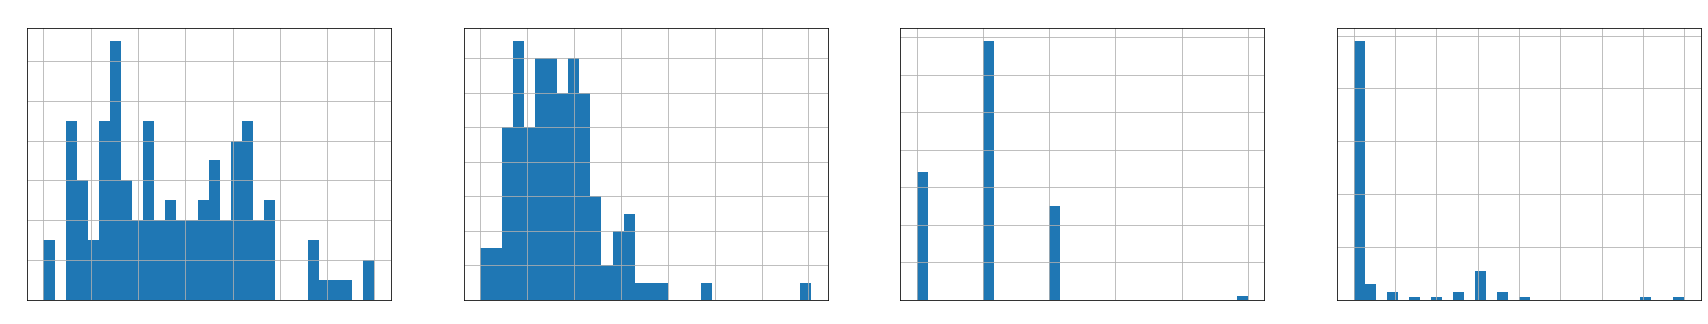

In [13]:
text_columns = ['name','description', 'images', 'tips_table']
fig, axes = plt.subplots(1, 4, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### IPM Data - `FruitVegCulturalItems.json`

| column      | type                                       |
|-------------|--------------------------------------------|
| name        | string                                     |
| url         | string                                     |
| description | string                                     |
| images      | [{src: " ", caption: " "}]                 |
| tips_table  | [{header: " ", row: " "(, row: " ", ...)}] |

Example of the single JSON data entry:
```json
{
    "name": "Planting cucurbits",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/CULTURAL/cantaloupeplant.html?src=exchbt",
    "description": "Cucurbits can be seeded directly or transplanted into the garden. It is ...",
    "images": [
        {
            "src": "http://ipm.ucanr.edu/PMG/GARDEN/IMAGES/CULTURAL/transplant.jpg?src=exchbt",
            "caption": "Transplanting"
        }
    ],
    "tips_table": [
        {
            "header": "Planting tips"
        },
        {
            "row": "Distance in inches "
        },
        {
            "row": "Between plants in rows Between rows "
        },
        {
            "row": "Cucumbers 24 48 "
        },
        {
            "row": "Melons 12 72 "
        },
        {
            "row": "Pumpkins 48 72 "
        },
        {
            "row": "Squash 48 48-72"
        }
    ]
}
```
### Metadata on data source

Information on fruits and veggies for cultivation purposes.

## Garden control - pest related items

In [38]:
FILE_NAME = 'GardenControlsPestItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         20 non-null     object
 1   url          20 non-null     object
 2   description  20 non-null     object
 3   images       20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


In [39]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [16]:
df.sample(5)

,name,url,description,images
10,Identification: Characteristics of Broadleaf P...,http://ipm.ucanr.edu/PMG/WEEDS/ID/brdlfchar.ht...,"Broadleaf plants have relatively broad leaves,...","[{'link': '', 'src': 'http://ipm.ucanr.edu/TOO..."
2,Applying dormant or delayed-dormant treatments,http://ipm.ucanr.edu/PMG/GARDEN/CONTROLS/dorma...,"In fruit trees, yearly applications of a dorma...",[]
4,Viral diseases,http://ipm.ucanr.edu/PMG/GARDEN/CONTROLS/virus...,Caterpillars are often killed by diseases caus...,[{'link': 'http://ipm.ucanr.edu/PMG/H/I-LP-HAR...
12,Identification: Characteristics of Mistletoe P...,http://ipm.ucanr.edu/PMG/WEEDS/ID/mistletoecha...,Large-leaf mistletoes are evergreen perennial ...,"[{'link': '', 'src': 'http://ipm.ucanr.edu/TOO..."
1,,http://ipm.ucanr.edu/PMG/GARDEN/CONTROLS/exclu...,One of the most important components of a weed...,[{'link': 'http://ipm.ucanr.edu/PMG/C/S-GA-CUL...


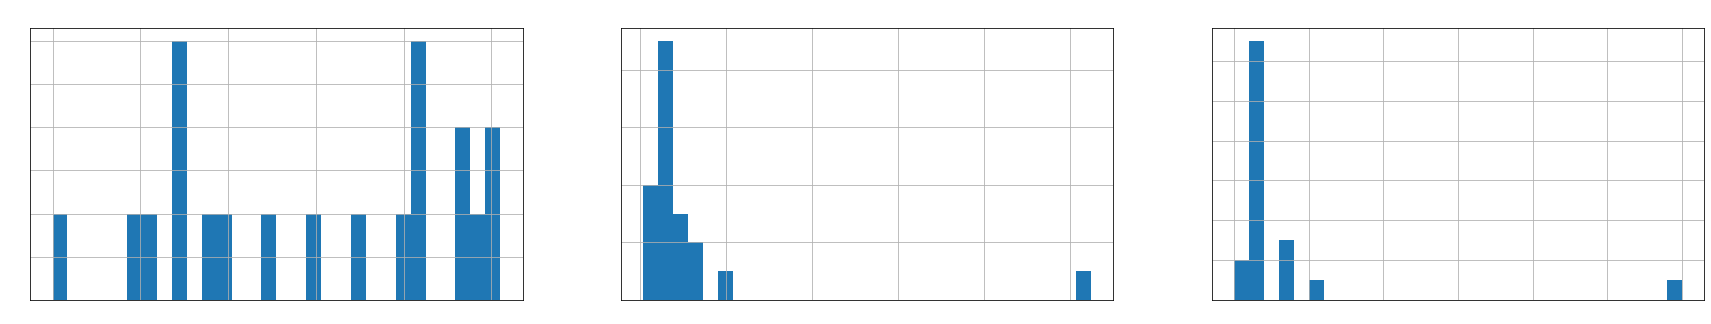

In [17]:
text_columns = ['name','description', 'images']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### IPM Data - `GardenControlsPestItems.json`

| column      | type                                       |
|-------------|--------------------------------------------|
| name        | string                                     |
| url         | string                                     |
| description | string                                     |
| images      | [{src: " ", caption: " "}]                 |

Example of the single JSON data entry:
```json
{
    "name": "Parasites",
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/CONTROLS/parasites.html?src=exchbt",
    "description": "Insect parasites (parasitoids) are smaller than their hosts and develop inside, or attached to the ...",
    "images": [
        {
            "link": "http://ipm.ucanr.edu/PMG/S/I-LP-SCON-AS.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/S/I-LP-SCON-AS.001a.jpg?src=exchbt",
            "caption": "Apanteles cocoons"
        },
        {
            "link": "",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/PESTICIDES/parasitelifecycle.jpg?src=exchbt",
            "caption": "Life cycle of a Hyposoter parasite"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/S/I-LP-SCON-HF.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/S/I-LP-SCON-HF.002a.jpg?src=exchbt",
            "caption": "Redhumped caterpillars parasitized by Hyposoter wasps"
        }
    ]
}
```
### Metadata on data source

Information on pest control remedies from pest perspective.

## Garden control - pesticide related items

In [18]:
FILE_NAME = 'GardenControlsPesticideItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   active_ingredient  19 non-null     object
 1   url                19 non-null     object
 2   pesticide_type     19 non-null     object
 3   information        19 non-null     object
dtypes: object(4)
memory usage: 736.0+ bytes


In [19]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [20]:
df.sample(5)

,active_ingredient,url,pesticide_type,information
18,Chlorothalonil,http://ipm.ucanr.edu/TOOLS/PNAI/pnaishow.php?i...,fungicide,[{'acute_toxicity': 'Toxicity rating: Not Acut...
16,Horticultural oil,http://ipm.ucanr.edu/TOOLS/PNAI/pnaishow.php?i...,"fungicide, insecticide (oil), miticide",[{'acute_toxicity': 'Toxicity rating: Not Acut...
6,Acephate,http://ipm.ucanr.edu/TOOLS/PNAI/pnaishow.php?i...,insecticide (organophosphate),[{'acute_toxicity': 'Toxicity rating: Slightly...
7,Sulfur,http://ipm.ucanr.edu/TOOLS/PNAI/pnaishow.php?i...,fungicide,[{'acute_toxicity': 'Toxicity rating: Not Acut...
17,Glyphosate,http://ipm.ucanr.edu/TOOLS/PNAI/pnaishow.php?i...,herbicide,[{'acute_toxicity': 'Toxicity rating: Slightly...


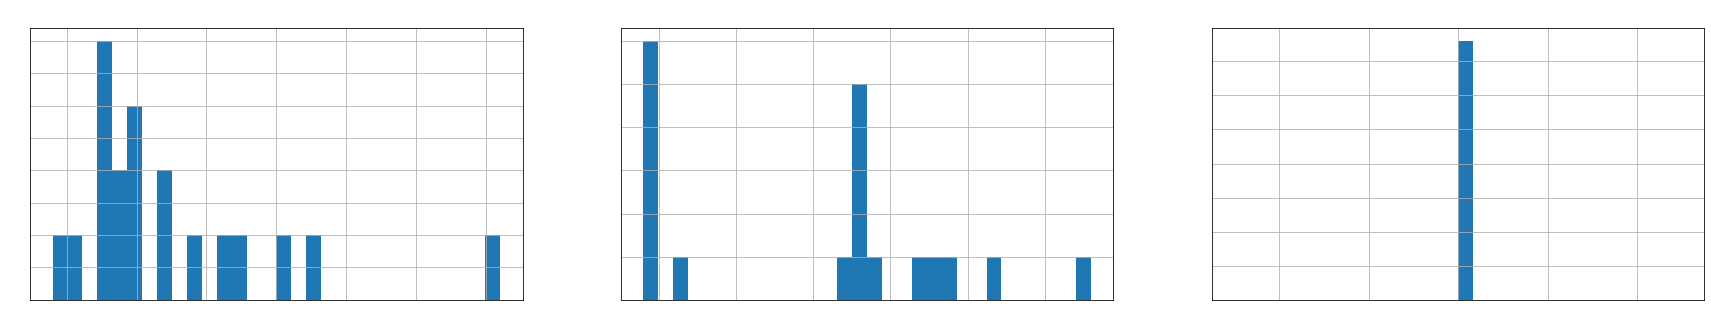

In [21]:
text_columns = ['active_ingredient','pesticide_type', 'information']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

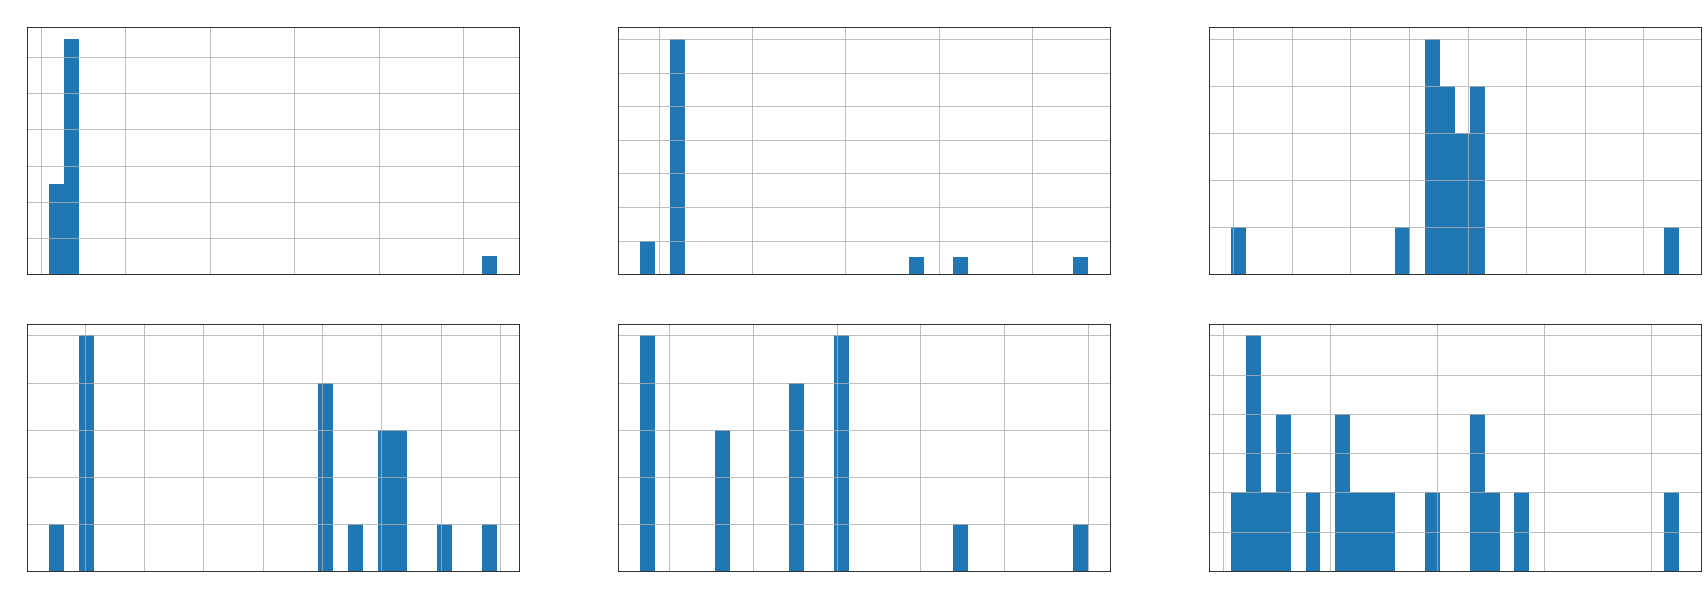

In [22]:
information_columns = ["acute_toxicity", "long_term_toxicity", "water_quality_rating", "impact_on_natural_enemies", "impact_on_honey_bees", "associated_pests"]
fig, axes = plt.subplots(2, 3, figsize = (30, 10))
for i, col in enumerate(information_columns):
    r = i//3
    c = i%3
    df['information'].apply(lambda x: x[0][col]).apply(len).hist(figure = fig, bins = 30, ax = axes[r][c])
    axes[r][c].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### IPM Data - `GardenControlsPesticideItems.json`

| column            | type                                                                                                                                                          |
|-------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| active_ingredient | string                                                                                                                                                        |
| url               | string                                                                                                                                                        |
| pesticide_type    | string                                                                                                                                                        |
| information       | [{acute_toxicity: " ", long_term_toxicity: " ", water_quality_rating: " ", impact_on_natural_enemies: " ", impact_on_honey_bees: " ", associated_pests: " "}] |

Example of the single JSON data entry:
```json
{
    "active_ingredient": "Potassium bicarbonate",
    "url": "http://ipm.ucanr.edu/TOOLS/PNAI/pnaishow.php?id=60?src=exchbt",
    "pesticide_type": "fungicide",
    "information": [
        {
            "acute_toxicity": "Toxicity rating: No information",
            "long_term_toxicity": "On US EPA list: Not listed; On CA Proposition list: Not listed",
            "water_quality_rating": "Overall runoff risk rating: No information Notes: No information available",
            "impact_on_natural_enemies": "Overall toxicity rating: No information",
            "impact_on_honey_bees": "Toxicity category: No information",
            "associated_pests": "Powdery Mildew on Ornamentals, Roses in the Garden and Landscape: Diseases and Abiotic Disorders, powdery mildew"
        }
    ]
}
```
### Metadata on data source

Information on pesticide control remedies with details.

## Weed Items

In [23]:
FILE_NAME = 'WeedIdItems.json'
df = pd.read_json(_PATH + FILE_NAME)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         28 non-null     object
 1   url          28 non-null     object
 2   description  28 non-null     object
 3   images       28 non-null     object
dtypes: object(4)
memory usage: 1.0+ KB


In [24]:
print('Field with less than 50% non-null entries:')
for c in df.columns:
    if df[df[c].str.len() > 0].shape[0] / df[c].shape[0] < 0.5:
        print(f'{c:<20} - {(df[df[c].str.len() > 0].shape[0] / df[c].shape[0]) * 100:.0f}%')

Field with less than 50% non-null entries:


In [25]:
df.sample(5)

,name,url,description,images
2,Specialized stems,http://ipm.ucanr.edu/PMG/WEEDS/ID/broadspecial...,"Specialized stems, rhizomes and stolons, typic...",[{'src': 'http://ipm.ucanr.edu/TOOLS/TURF/IMAG...
1,Growth habit,http://ipm.ucanr.edu/PMG/WEEDS/ID/broadhabit.h...,Broadleaves may grow prostrate and form a mat ...,[{'src': 'http://ipm.ucanr.edu/TOOLS/TURF/IMAG...
7,Leaf margins,http://ipm.ucanr.edu/PMG/WEEDS/ID/broadmargin....,The type of leaf edge (margin) is another way ...,[{'src': 'http://ipm.ucanr.edu/TOOLS/TURF/IMAG...
18,Specialized Stems,http://ipm.ucanr.edu/PMG/WEEDS/ID/stolons.html...,,[{'src': 'http://ipm.ucanr.edu/TOOLS/TURF/IMAG...
26,Leaves (leaf blades and tips),http://ipm.ucanr.edu/PMG/WEEDS/ID/leaftips.htm...,"Leaves may be flat, rolled, or twisted, and va...",[{'src': 'http://ipm.ucanr.edu/TOOLS/TURF/IMAG...


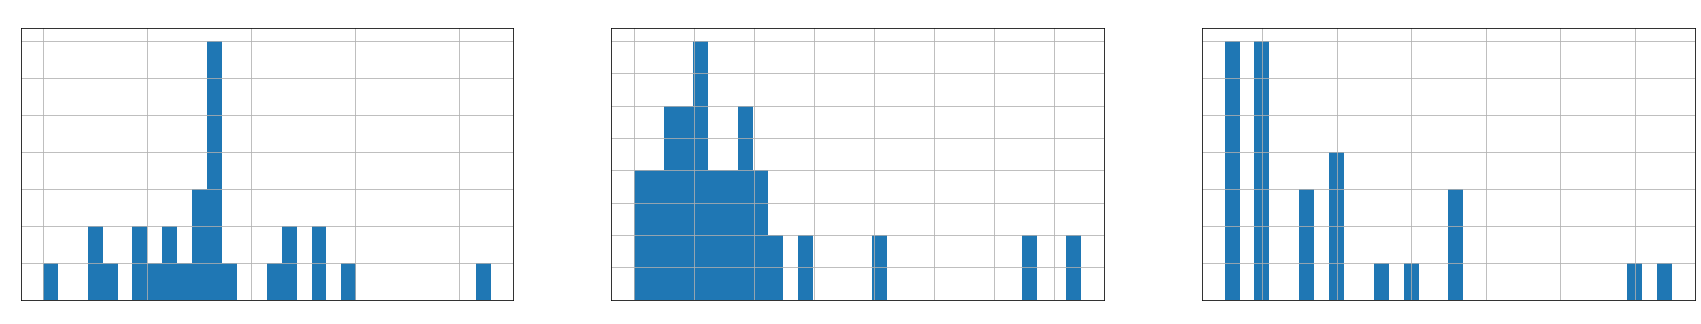

In [26]:
text_columns = ['name','description', 'images']
fig, axes = plt.subplots(1, 3, figsize = (30, 5))
for i, col in enumerate(text_columns):
    df[col].apply(len).hist(figure = fig, bins = 30, ax = axes[i])
    axes[i].set_title(col, fontdict = {'fontsize': 20})
plt.show()

### IPM Data - `WeedIdItems.json`

| column      | type                                       |
|-------------|--------------------------------------------|
| name        | string                                     |
| url         | string                                     |
| description | string                                     |
| images      | [{src: " ", caption: " "}]                 |

Example of the single JSON data entry:
```json
{
    "name": "Growth habit",
    "url": "http://ipm.ucanr.edu/PMG/WEEDS/ID/broadhabit.html?src=exchbt",
    "description": "Broadleaves may grow prostrate and form a mat or they may grow upright.",
    "images": [
        {
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/prostrate_upright.jpg?src=exchbt",
            "caption": "A plant growing prostrate and upright"
        }
    ]
}
```
### Metadata on data source

Information on weed pests.

## Final Transformation



### Fruit and Veggie Cultural

```json
{
    "name": "Planting cucurbits",                                                                   # name
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/VEGES/CULTURAL/cantaloupeplant.html?src=exchbt",        # url
    "description": "Cucurbits can be seeded directly or transplanted into the garden. It is ...",   # description
    "images": [                                                                                     # links (type - images)
        {
            "src": "http://ipm.ucanr.edu/PMG/GARDEN/IMAGES/CULTURAL/transplant.jpg?src=exchbt",
            "caption": "Transplanting"
        }
    ],
    "tips_table": [                                                                                 # omit for now
        {
            "header": "Planting tips"
        },
        {
            "row": "Distance in inches "
        },
        {
            "row": "Between plants in rows Between rows "
        },
        {
            "row": "Cucumbers 24 48 "
        },
        {
            "row": "Melons 12 72 "
        },
        {
            "row": "Pumpkins 48 72 "
        },
        {
            "row": "Squash 48 48-72"
        }
    ]
}
```
### Garden Pest Control
```json
{
    "name": "Parasites",                                                                                                        # name
    "url": "http://ipm.ucanr.edu/PMG/GARDEN/CONTROLS/parasites.html?src=exchbt",                                                # url
    "description": "Insect parasites (parasitoids) are smaller than their hosts and develop inside, or attached to the ...",    # description
    "images": [                                                                                                                 # links (type - images)
        {
            "link": "http://ipm.ucanr.edu/PMG/S/I-LP-SCON-AS.001.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/S/I-LP-SCON-AS.001a.jpg?src=exchbt",
            "caption": "Apanteles cocoons"
        },
        {
            "link": "",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/PESTICIDES/parasitelifecycle.jpg?src=exchbt",
            "caption": "Life cycle of a Hyposoter parasite"
        },
        {
            "link": "http://ipm.ucanr.edu/PMG/S/I-LP-SCON-HF.002.html?src=exchbt",
            "src": "http://ipm.ucanr.edu/PMG/IMAGES/S/I-LP-SCON-HF.002a.jpg?src=exchbt",
            "caption": "Redhumped caterpillars parasitized by Hyposoter wasps"
        }
    ]
}
```
### Garden Pesticide Control
```json
{
    "active_ingredient": "Potassium bicarbonate",                                                                       # name
    "url": "http://ipm.ucanr.edu/TOOLS/PNAI/pnaishow.php?id=60?src=exchbt",                                             # url
    "pesticide_type": "fungicide",                                                                                      # merge with name
    "information": [                                                                                                    # for now simply take `associated_pests` as description
        {
            "acute_toxicity": "Toxicity rating: No information",
            "long_term_toxicity": "On US EPA list: Not listed; On CA Proposition list: Not listed",
            "water_quality_rating": "Overall runoff risk rating: No information Notes: No information available",
            "impact_on_natural_enemies": "Overall toxicity rating: No information",
            "impact_on_honey_bees": "Toxicity category: No information",
            "associated_pests": "Powdery Mildew on Ornamentals, Roses in the Garden and Landscape: Diseases and ..."    # description
        }
    ]
}
```
### Weed Pests
```json
{
    "name": "Growth habit",                                                                                 # name
    "url": "http://ipm.ucanr.edu/PMG/WEEDS/ID/broadhabit.html?src=exchbt",                                  # url
    "description": "Broadleaves may grow prostrate and form a mat or they may grow upright.",               # description
    "images": [                                                                                             # links (type - images)
        {
            "src": "http://ipm.ucanr.edu/TOOLS/TURF/IMAGES/PESTMANIM/prostrate_upright.jpg?src=exchbt",
            "caption": "A plant growing prostrate and upright"
        }
    ]
}
`
```


### Final mapping

`Combined` index:
```json
{
    "source"        : "infoFruitVegCultural/infoPestControl/infoPesticideControl/pestsWeed",
    "name"          : "text",
    "url"           : "url",
    "description"   : "text",
    "links": [
        {
            "type"      : "images",
            "title"     : "...",
            "src"       : "urlSource",
            "link"      : "urlAdditional"
        },
        ...
    ]
}
```
    # columns from IPM Dec2021
    # identification
    # development
    # damage
    # management

    # columns from AskExtension
    # source    : askextension
    # title     : name
    # question  : description
    # tags      : links (type - tag)
    # answers   : links (type - answer)
}
```

## ETL of data

In [5]:
cols = ['source', 'url', 'name', 'description', 'identification', 'development', 'damage', 'management', 'links']

def infoFruitVegCultural():
    # -------------------------------------------- Fruit and veggie cultural tips
    print(f'Merging fruit and veggie cultural tips..')
    FILE_NAME = 'FruitVegCulturalItems.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description images tips_table
    final schema:
    source url name description identification development damage management links
    '''

    df['source']= 'infoFruitVegCultural'

    df.rename(columns = {'images': 'links'}, inplace = True)
    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : ''            ,
            'title' : i['caption']  
        } for i in l])
    
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''

    df = df[cols]
    
    return df

df = infoFruitVegCultural()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def infoPestControl():
    # -------------------------------------------- Garden pest control
    print(f'Merging garden pest control information...')
    FILE_NAME = 'GardenControlsPestItems.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description images
    final schema:
    source url name description identification development damage management links
    '''

    df['source']= 'infoPestControl'

    df.rename(columns = {'images': 'links'}, inplace = True)
    df['links'] = df['links'].apply(lambda d: d if isinstance(d, list) else [])

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'               , 
            'src'   : i.get('src'       , ''), 
            'link'  : i.get('link'      , ''),
            'title' : i.get('caption'   , '')
        } for i in l])
    
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''

    df = df[cols]
    
    return df

df = infoPestControl()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def infoPesticideControl():
    # -------------------------------------------- Garden pesticide control
    print(f'Merging garden pesticide control information...')
    FILE_NAME = 'GardenControlsPesticideItems.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    active_ingredient url pesticide_type information
    final schema:
    source url name description identification development damage management links
    '''

    df['source'     ] = 'infoPesticideControl'
    df['name'       ] = df[['active_ingredient', 'pesticide_type']].agg(' - '.join, axis=1)
    df['description'] = df['information'].str[0].apply(lambda x: x['associated_pests'])
    df['links'      ] = [[] for _ in range(len(df))]
    
    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''


    df = df[cols]

    return df

df = infoPesticideControl()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')


def pestsWeed():
    # -------------------------------------------- Weed related pests
    print(f'Merging weed related pests...')
    FILE_NAME = 'WeedIdItems.json'
    df = pd.read_json(_PATH + FILE_NAME)
    '''
    columns in source:
    name url description images
    final schema:
    source url name description identification development damage management links
    '''

    df['source'] = 'pestsWeed'

    df.rename(columns = {'images': 'links'}, inplace = True)

    # df['links'] = df['links'].apply(lambda d: d if isinstance(d, list) else [])

    df['links'] = df['links'].apply(lambda l: [
        {
            'type'  : 'image'       , 
            'src'   : i['src']      , 
            'link'  : ''            ,
            'title' : i['caption']  
        } for i in l])

    df['identification' ] = ''
    df['development'    ] = ''
    df['damage'         ] = ''
    df['management'     ] = ''

    df = df[cols]

    return df

df = pestsWeed()
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')

def _clean(text):
    '''
    Fix encodings and remove escape and redundant whitespace characters from text.
    '''
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

colsVector = ['name', 'description']
for c in colsVector:
    finalDf[c] = finalDf[c].apply(_clean)

print(f'Fix encodings and remove escape and redundant whitespace characters from text.')
print(f'------------------------------------------------')

print(f'Final dataframe shape: {finalDf.shape    }')
print(f'FINISHED')

finalDf.sample(5)

Merging fruit and veggie cultural tips..
Final dataframe shape: (1561, 9)
------------------------------------------------
Merging garden pest control information...
Final dataframe shape: (1581, 9)
------------------------------------------------
Merging garden pesticide control information...
Final dataframe shape: (1600, 9)
------------------------------------------------
Merging weed related pests...
Final dataframe shape: (1628, 9)
------------------------------------------------
Fix encodings and remove escape and redundant whitespace characters from text.
------------------------------------------------
Final dataframe shape: (1628, 9)
FINISHED


,source,url,name,description,identification,development,damage,management,links
218,pestsDiseases,http://ipm.ucanr.edu/PMG/GARDEN/VEGES/PESTS/ca...,Cabbage maggot,"Cabbage maggot larvae are small, legless, and ...",,The life cycles of maggots on vegetable crops ...,Maggots tunnel through root systems of all col...,Prevention is the best management strategy. Av...,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed..."
1126,damagesWeed,http://ipm.ucanr.edu/PMG/WEEDS/stinkgrass.html...,Lovegrasses,"Lovegrasses are winter or summer annuals, or p...",,,,,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed..."
608,pestsDiseases,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/PESTS/br...,Avocado brown mite,This spider mite (family Tetranychidae) is occ...,"To locate avocado brown mite and its webbing, ...",Avocado brown mite develops through 5 life sta...,Avocado brown mite feeds by sucking on avocado...,Temperature (hot or cold weather) and predator...,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed..."
138,pestsIPM,http://ipm.ucanr.edu/PMG/PESTNOTES/pn74157.htm...,Indian Walking Stick,"Walking stick insects, order Phasmatodea, are ...",,Adult females can live for several months and ...,The worst damage typically is recorded in the ...,Indian walking sticks usually are mostly a nui...,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed..."
587,pestsDiseases,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/PESTS/ne...,Natural enemies,"An egg parasite, Anagrus epos, is commonly pre...",,,,,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed..."


# AskExtension Data

## Data

In [6]:
import json

PATH = '../data/askextension/2020-08-20/'
FILE_NAMES = [PATH + f for f in sorted(os.listdir(PATH))]

with open(FILE_NAMES[0]) as f:
    f = json.load(f)
    print(json.dumps(f[0], indent = 2))

{
  "faq-id": 3,
  "title": "When can I plant blue spruce trees in Colorado? #109900",
  "created": "2012-12-03 15:53:47",
  "updated": "2012-12-03 17:47:21",
  "tags": [
    "trees and shrubs"
  ],
  "state": "Colorado",
  "county": "El Paso County",
  "question": "I need to plant two blue spruce trees that are currently in 24\" diameter plastic containers with drain holes in the bottom sides.\n\nLocation: northeast side of Colorado Springs.\n\nThese trees are currently outside on the patio and susceptible to the wind and sun. The trees were watered this past Saturday and seem to be healthy.\n\nQuestion: Can these trees be planted now? Currently the soil is not frozen and night time temps are 35 to 40 degrees.\n\nI have downloaded and read CMG GardenNotes #633 as a reference.\n\nAny advice would be greatly appreciated. ",
  "answer": {
    "1": {
      "response": "Jerry, \nyou can plant them now (a) OR temporarily \"plant\" them, still in containers, so that roots have some insulatio

Data constists 4 files:
- 2012-2014.json
- 2014-2016.json
- 2016-2018.json
- 2018-2020.json

It is a list of dictionary objects with following fields:
- `faq-id` - ID of the ticket
- `title` - title of the ticket along ID of the ticket (__other__ ID)
- `created` - ticket creating date
- `updated` - ticket last update date
- `tags` - list of tags
- `state` - state ticket was created in
- `county` - county ticket was created in
- `question` - question that has been posted
- `answer` - response lists presented in numbered dictionary data type

## ETL

Following transformations are performed:
- merge source into single JSON file
- filter out ticket from all states except _California_
- retrive ticket ID from title
- create URL of ticket
- clean long text columns - `title`, `question`, `answer`
- create new column out of `title` and `question`
- remove tickets that have less than 3 words in `title` and `quesiton` combined
- limit the number of characters to 1000 for `title`, `question`, `answer` columns

Modify `STATE_FILTER` and `MIN_WORD_COUNT` variables accordingly.

In [7]:
import sys
import re

from string import punctuation as pn


STATE_FILTER    = ['California']
MIN_WORD_COUNT  = 3

ASKEXTENSION_QUESTION_URL = 'https://ask2.extension.org/kb/faq.php?id='

# Combines the data files into one and returns it.
df = pd.DataFrame()
for f in FILE_NAMES:
    df = df.append(pd.read_json(f), ignore_index = True)

df['source'] = 'askExtension'

# Convert 'faq-id' to str type
df['faq-id'] = df['faq-id'].astype(str)

# Leave tickets from California state
df = df[df['state'].isin(STATE_FILTER)]

# Add the URL and leave blank URL for questions with no ID
df['url'] = [
    f"{ASKEXTENSION_QUESTION_URL}{ticket_no}" if len(ticket_no) == 6 else ""
    for ticket_no in df['title'].str.split('#').str[-1]
]

# Add the ticket number from title and leave blank for questions without
df['ticket-no'] = [
    ticket_no if len(ticket_no) == 6 else ""
    for ticket_no in df['title'].str.split('#').str[-1]
]

df.rename(columns = {'faq-id': 'faq_id', 'ticket-no': 'ticket_no'}, inplace = True)

def _clean(text):
    '''
    Fix encodings and remove escape and redundant whitespace characters from text.

    Examples with non-ascii characters - 110358, 147160
    Examples with redundant whitespace - 117069, 127760

    See: https://stackoverflow.com/a/53821967/5480536
    '''
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def _transform_answer(answer_dict):
    '''
    Convert answer field from a dictionary to a list.
    '''
    answers = [{}] * len(answer_dict)
    
    for k, v in answer_dict.items():
        # clean the response up
        v = {
            'type'  : 'answer'  ,
            'src'   : ''        , 
            'link'  : ''        ,
            'title' : _clean(v['response']),
        }
        answers[int(k) - 1] = v
    
    return answers

# Transform answer for consistency with IPM data
df['links'] = df['answer'].apply(_transform_answer)

# Strip all spaces and remove non-ascii characters from text fields
for column in ['state', 'title', 'question']:
    df[column] = df[column].apply(_clean)

def _transform_title(title):
    '''
    Remove question ID from title, and append '.' in the end
    if no punctuation was detected.

    Example with '#' - 437259
    Example with '...' - 437264
    '''
    title = ''.join(title.split('#')[:-1]).strip().strip('...')
    
    # add a '.' if it does not yet end with a punctuation
    title = title if (title and title[-1] in pn) else title + '.'
    
    return title

# Clean ID and '...' from title, and append punctuation if not present
df['name'] = df['title'].apply(_transform_title)

def _merge_title_question(df):
    '''
    Create new column from questions and title,
    but only if it is not already exactly in the question.
    '''
    titles      = df['name'     ].tolist()
    questions   = df['question' ].tolist()
    
    tqs = [
        question
        if (title and question.startswith(title[:-1]))
        else title + " " + question
        for (title, question) in zip(titles, questions)
    ]

    return tqs

# Create new column from `title` and `question`, or only question
# if title is exactly the question     
df['description'] = _merge_title_question(df)
    
# Remove questions with small number words in title-question
if MIN_WORD_COUNT:
    df = df[df['description'].str.split().str.len() > MIN_WORD_COUNT]

df = df.loc[:, ['source', 'url', 'name', 'description', 'links']]
df.sample(5)

,source,url,name,description,links
36330,askExtension,https://ask2.extension.org/kb/faq.php?id=254768,HELLO my peonies have all.,HELLO my peonies have all bloomed in the pot I...,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
46626,askExtension,https://ask2.extension.org/kb/faq.php?id=286863,Sago palm.,Sago palm. Hi I need help. Can I separate the ...,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
128237,askExtension,https://ask2.extension.org/kb/faq.php?id=597454,Tying up a plumeria.,Tying up a plumeria. Do I need to tie up my pl...,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
108915,askExtension,https://ask2.extension.org/kb/faq.php?id=484083,Mushroom compost and for trees.,Mushroom compost and for trees When planning a...,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
65834,askExtension,https://ask2.extension.org/kb/faq.php?id=347949,pumpkins.,"pumpkins. I have pumpkin vines, flowers buds b...","[{'type': 'answer', 'src': '', 'link': '', 'ti..."


## Final mapping

`Merged` index:
```json
{
    "source"        : "askExtension",
    "name"          : "text",           # title
    "url"           : "url",            # url
    "description"   : "text",           # title_question
    "links": [
        {
            "type"      : "tag/answer",
            "title"     : "...",
            "src"       : "urlSource",
            "link"      : "urlAdditional"
        },
        ...
    ]
    # columns from AskExtension
    # identification
    # development
    # damage
    # management
}
```

In [8]:
cols = ['source', 'url', 'name', 'description', 'identification', 'development', 'damage', 'management', 'links']
'''
columns in source:
source url name description links
final schema:
source url name description identification development damage management links    
'''
df['identification' ] = ''
df['development'    ] = ''
df['damage'         ] = ''
df['management'     ] = ''
df = df[cols]
df.sample(5)

,source,url,name,description,identification,development,damage,management,links
130908,askExtension,https://ask2.extension.org/kb/faq.php?id=607519,what do I put in this space.,what do I put in this space. tell me how to ma...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
66243,askExtension,https://ask2.extension.org/kb/faq.php?id=349129,What plant is this?,What plant is this? It has some sort of fruit ...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
90172,askExtension,https://ask2.extension.org/kb/faq.php?id=425154,Cotton.,Cotton. How difficult is it to grow Cotton in ...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
64073,askExtension,https://ask2.extension.org/kb/faq.php?id=343110,What is the name of this plant?,What is the name of this plant? I included a p...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."
49191,askExtension,https://ask2.extension.org/kb/faq.php?id=296248,Meyer lemon leaves.,Meyer lemon leaves. What is causing this to ha...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti..."


In [9]:
finalDf = finalDf.append(df, ignore_index = True)
print(f'Final dataframe shape: {finalDf.shape}')
print(f'------------------------------------------------')

Final dataframe shape: (3799, 9)
------------------------------------------------


# Embedding text fields into vectors and stripping text fields for saving into ES

In [10]:
import sys

sys.path.insert(1, os.path.realpath(os.path.pardir))

os.environ['STAGE'      ] = 'dev'
os.environ['ES_USERNAME'] = 'elastic'
os.environ['ES_PASSWORD'] = 'changeme'
## select the environment for population
os.environ['ES_HOST'    ] = 'http://localhost:9200/'
# os.environ['ES_HOST'    ] = 'https://dev.es.chat.ask.eduworks.com/'
# os.environ['ES_HOST'    ] = 'https://qa.es.chat.ask.eduworks.com/'
os.environ['ES_IMITATE' ] = 'false'

import config

INFO:config:----------------------------------------------
INFO:config:Configuration variables for DEV environment
INFO:config:- stage           = dev
INFO:config:- es_search_size  = 100
INFO:config:- es_cut_off      = 0.4
INFO:config:- es_top_n        = 10
INFO:config:- es_ask_weight   = 0.6
INFO:config:----------------------------------------------
INFO:config:----------------------------------------------
INFO:config:Elasticsearch configuration:
INFO:config:- host                    = https://dev.es.chat.ask.eduworks.com/
INFO:config:- username                = elastic
INFO:config:- password                = changeme
INFO:config:- tfhub_embedding_url     = https://tfhub.dev/google/universal-sentence-encoder/4
INFO:config:- tfhub_cache_dir         = /var/tmp/tfhub_modules
INFO:config:----------------------------------------------
INFO:config:----------------------------------------------
INFO:config:Elasticsearch indexes:
INFO:config:- combined index          = combined
INFO:config:-

In [23]:
import importlib
importlib.reload(config)

INFO:config:----------------------------------------------
INFO:config:Configuration variables for DEV environment
INFO:config:- stage           = dev
INFO:config:- es_search_size  = 100
INFO:config:- es_cut_off      = 0.4
INFO:config:- es_top_n        = 10
INFO:config:- es_ask_weight   = 0.6
INFO:config:----------------------------------------------
INFO:config:----------------------------------------------
INFO:config:Elasticsearch configuration:
INFO:config:- host                    = http://localhost:9200/
INFO:config:- username                = elastic
INFO:config:- password                = changeme
INFO:config:- tfhub_embedding_url     = https://tfhub.dev/google/universal-sentence-encoder/4
INFO:config:- tfhub_cache_dir         = /var/tmp/tfhub_modules
INFO:config:----------------------------------------------
INFO:config:----------------------------------------------
INFO:config:Elasticsearch indexes:
INFO:config:- combined index          = combined
INFO:config:----------------

<module 'config' from '/home/biddy/Toptal/Eduworks/askchatbot/actions/es/config.py'>

### Embedding by splitting text to `CHUNK_SIZE` character chunks

In [11]:
# ---------------------------------------- Dataframe embeddings - text fields
CHUNK_SIZE = 1000

finalDf['vectors'] = np.empty((len(finalDf), 0)).tolist()

colsVector = ['name', 'description', 'identification', 'development', 'damage', 'management']
print(f'Final DF: Embedding columns - {colsVector}')
for i, r in finalDf.iterrows():
    c_vectors = []
    for c in colsVector:
        t = r[c]
        chunks, chunk_size = len(t), CHUNK_SIZE
        ts = [t[i:i+chunk_size] for i in range(0, chunks, chunk_size)]
        if len(ts) == 0:
            ts.append('')
        vectors   = config.embed(ts).numpy().tolist()
        for i, t in enumerate(vectors):
            c_vectors.append({'vector': vectors[i], 'name': c + '_' + str(i)})
    r['vectors'] = c_vectors

# ---------------------------------------- Dataframe embeddings - links fields
finalDf['vectors_links'] = np.empty((len(finalDf), 0)).tolist()

tmp = finalDf['links']
print('Final DF: Embedding column - links')
for i, r in enumerate(tmp):
    if len(tmp.iloc[i]) > 0:
        c_vectors = config.embed([i['title'] for i in tmp.iloc[i]]).numpy().tolist()
        finalDf['vectors_links'].iloc[i].extend([{'vector': v, 'order': i} for i, v in enumerate(c_vectors)])


finalDf.sample(5)

Final DF: Embedding columns - ['name', 'description', 'identification', 'development', 'damage', 'management']
Final DF: Embedding column - links


,source,url,name,description,identification,development,damage,management,links,vectors,vectors_links
2704,askExtension,https://ask2.extension.org/kb/faq.php?id=331710,Identification.,Identification. Just looking to identify my pl...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [-0.030877118930220604, -0.0163258...","[{'vector': [0.002043426502496004, 0.055400766..."
3370,askExtension,https://ask2.extension.org/kb/faq.php?id=442894,Roses in planter pots.,Roses in planter pots. Is it safe to add other...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.05381133779883385, 0.0194518845...","[{'vector': [-0.02828361466526985, 0.028796900..."
3797,askExtension,https://ask2.extension.org/kb/faq.php?id=615017,looking for pre-flowering buds of Corylus avel...,looking for pre-flowering buds of Corylus avel...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.020650308579206467, 0.008997958...","[{'vector': [0.018974674865603447, 0.052462298..."
2616,askExtension,https://ask2.extension.org/kb/faq.php?id=321404,Can You Identify this plant?,Can You Identify this plant? I got this as a c...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [-0.04306323826313019, 0.048903234...","[{'vector': [-0.017537934705615044, 0.06948010..."
1070,damagesWeed,http://ipm.ucanr.edu/PMG/WEEDS/blunt_spikerush...,Blunt spikerush,"Blunt spikerush, a common annual sedge, may be...",,,,,"[{'type': 'image', 'src': 'http://ipm.ucanr.ed...","[{'vector': [-0.00731231365352869, 0.012201887...","[{'vector': [0.038101717829704285, 0.045209027..."


### Embedding by default length

In [9]:
# ---------------------------------------- Dataframe embeddings - text fields
finalDf['vectors'] = np.empty((len(finalDf), 0)).tolist()

colsVector = ['name', 'description', 'identification', 'development', 'damage', 'management']
vectors = []

for c in colsVector:
    print(f'Final DF: Embedding column - {c}')
    c_list      = finalDf[c].tolist()
    c_vectors   = config.embed(c_list).numpy().tolist()
    vectors.append(c_vectors)

for i, r in enumerate(finalDf['vectors']):
    for c in range(len(colsVector)):
        r.append({'vector': vectors[c][i], 'name': colsVector[c]})


# ---------------------------------------- Dataframe embeddings - links fields
finalDf['vectors_links'] = np.empty((len(finalDf), 0)).tolist()

tmp = finalDf['links']
print('Final DF: Embedding column - links')
for i, r in enumerate(tmp):
    if len(tmp.iloc[i]) > 0:
        c_vectors = config.embed([i['title'] for i in tmp.iloc[i]]).numpy().tolist()
        finalDf['vectors_links'].iloc[i].extend([{'vector': v, 'order': i} for i, v in enumerate(c_vectors)])
        

finalDf.sample(5)

Final DF: Embedding column - name
Final DF: Embedding column - description
Final DF: Embedding column - identification
Final DF: Embedding column - development
Final DF: Embedding column - damage
Final DF: Embedding column - management
Final DF: Embedding column - links


,source,url,name,description,identification,development,damage,management,links,vectors,vectors_links
3045,askExtension,https://ask2.extension.org/kb/faq.php?id=413321,Ants for five months. Help!,Ants for five months. Help! So I live in an ap...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.0124294962733984, -0.0093928677...","[{'vector': [0.04957588016986847, 0.0262171905..."
888,damagesEnvironment,http://ipm.ucanr.edu/PMG/GARDEN/FRUIT/ENVIRON/...,Pruning,Apricots are pruned during the early developme...,,,,,[],"[{'vector': [-0.03255358710885048, -0.05985959...",[]
1529,askExtension,https://ask2.extension.org/kb/faq.php?id=155823,is this an termite.,is this an termite. can you look.at the attach...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [-0.03979642689228058, 0.035843439...","[{'vector': [0.03573064133524895, 0.0797966718..."
2137,askExtension,https://ask2.extension.org/kb/faq.php?id=287438,Help naming these plants trees shrubs etc?!,Help naming these plants trees shrubs etc?! Hi...,,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [-0.04502515494823456, -0.00485226...","[{'vector': [0.04726199805736542, 0.0234065763..."
1970,askExtension,https://ask2.extension.org/kb/faq.php?id=262713,Colorful Plum Tree Ooz.,"Colorful Plum Tree Ooz. Hello All,I have a ~20...",,,,,"[{'type': 'answer', 'src': '', 'link': '', 'ti...","[{'vector': [0.05282450467348099, 0.0672906562...","[{'vector': [-0.010488322004675865, 0.01895380..."


In [12]:
CHAR_LIMIT = 100

if CHAR_LIMIT:
    print(f'Striping text field to {CHAR_LIMIT} characters...')

    # -------------------------------------------- Dataframe text stripping

    columnsText = ['name', 'description', 'identification', 'development', 'damage', 'management']
    for c in columnsText:
        finalDf[c] = finalDf[c].str[:CHAR_LIMIT]
    
    tmp = finalDf['links']
    for i, _ in enumerate(tmp):
        if len(tmp[i]) > 0:
            for j, _ in enumerate(tmp[i]):
                tmp[i][j]['title'] = tmp[i][j]['title'][:CHAR_LIMIT]

Striping text field to 100 characters...


## Injesting data into ES

In [13]:
mapping  = {
    "settings": {"number_of_shards": 2, "number_of_replicas": 1},
    "mappings": {
        "dynamic"   : "false",
        "_source"   : {"enabled": "true"},
        "properties": {
            "source"        : {"type": "keyword", "index": "true"},
            "url"           : {"type": "keyword", "index": "false"},

            "name"          : {"type": "keyword", "index": "false"},
            "description"   : {"type": "keyword", "index": "false"},
            "identification": {"type": "keyword", "index": "false"},
            "development"   : {"type": "keyword", "index": "false"},
            "damage"        : {"type": "keyword", "index": "false"},
            "management"    : {"type": "keyword", "index": "false"},
            "vectors"       : {
                "type"      : "nested",
                "properties": {
                    "vector": {
                        "type": "dense_vector", 
                        "dims": 512
                    },
                    "name"  : {"type": "keyword", "index": "false"}
                }
            },
            
            "links"         : {
                "type"      : "nested",
                "properties": {
                    "type"  : {"type": "keyword", "index": "false"},
                    "src"   : {"type": "keyword", "index": "false"},
                    "link"  : {"type": "keyword", "index": "false"},
                    "title" : {"type": "keyword", "index": "false"}
                }
            },
            "vectors_links" : {
                "type"      : "nested",
                "properties": {
                    "vector": {
                        "type": "dense_vector", 
                        "dims": 512
                    },
                    "order"  : {"type": "keyword", "index": "false"}
                }
            }
        }
    }
}

final_json = finalDf.to_dict('records')

In [14]:
from elasticsearch import Elasticsearch
from elasticsearch.helpers import parallel_bulk

from collections import deque

# increase the timeout if necessary
es_client = Elasticsearch([config.es_host], http_auth=(config.es_username, config.es_password), timeout = 20)

es_client.indices.delete(
    index   = config.es_combined_index, 
    ignore  = 404)
es_client.indices.create(
    index       = config.es_combined_index  , 
    settings    = config.ES_COMBINED_MAPPING['settings'], 
    mappings    = config.ES_COMBINED_MAPPING['mappings'])
# play with chunk size parameter for timed out problem
deque(parallel_bulk(es_client, actions = final_json, index = config.es_combined_index, max_chunk_bytes = 5 * 1024 * 1024), maxlen = 0)

es_client.indices.refresh()

INFO:elasticsearch:GET https://dev.es.chat.ask.eduworks.com:443/ [status:200 request:1.351s]
INFO:elasticsearch:DELETE https://dev.es.chat.ask.eduworks.com:443/combined [status:200 request:0.385s]
INFO:elasticsearch:PUT https://dev.es.chat.ask.eduworks.com:443/combined [status:200 request:0.746s]
INFO:elasticsearch:POST https://dev.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:6.984s]
INFO:elasticsearch:POST https://dev.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:7.150s]
INFO:elasticsearch:POST https://dev.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:7.929s]
INFO:elasticsearch:POST https://dev.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:3.331s]
INFO:elasticsearch:POST https://dev.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:4.168s]
INFO:elasticsearch:POST https://dev.es.chat.ask.eduworks.com:443/combined/_bulk [status:200 request:11.499s]
INFO:elasticsearch:POST https://dev.es.chat.ask.eduwo

{'_shards': {'total': 4, 'successful': 2, 'failed': 0}}